### Week2 Basic Charting

In [19]:
%matplotlib notebook 
# the IPython magic %matplotlib notebook

When run the magic funciton matplotlib with the inline parameter

matplotlib is configured to render into the browser 

This configuration is called a backend

Backend: An abstraction layer, knows how to interact with the operating environment (operatinf system/browser etc.)


In [3]:
import matplotlib as mpl
mpl.get_backend() 
# using the NbAgg backend

'nbAgg'

Next layer - The artist layer (an abstraction around drawing and layout primitives)

The root of visuals is a set of containers which includes a figure object with one or more subplots, each with a series of one or more axes.

So the axes is the last object (changing the range of a given axis or plotting shapes to it) made up of two axis objtcts (horizontal and vertical)

In [2]:
import matplotlib.pyplot as plt
# *means we could pass any number of arguments

Next layer-scripting layer (in this course, using pyolt)

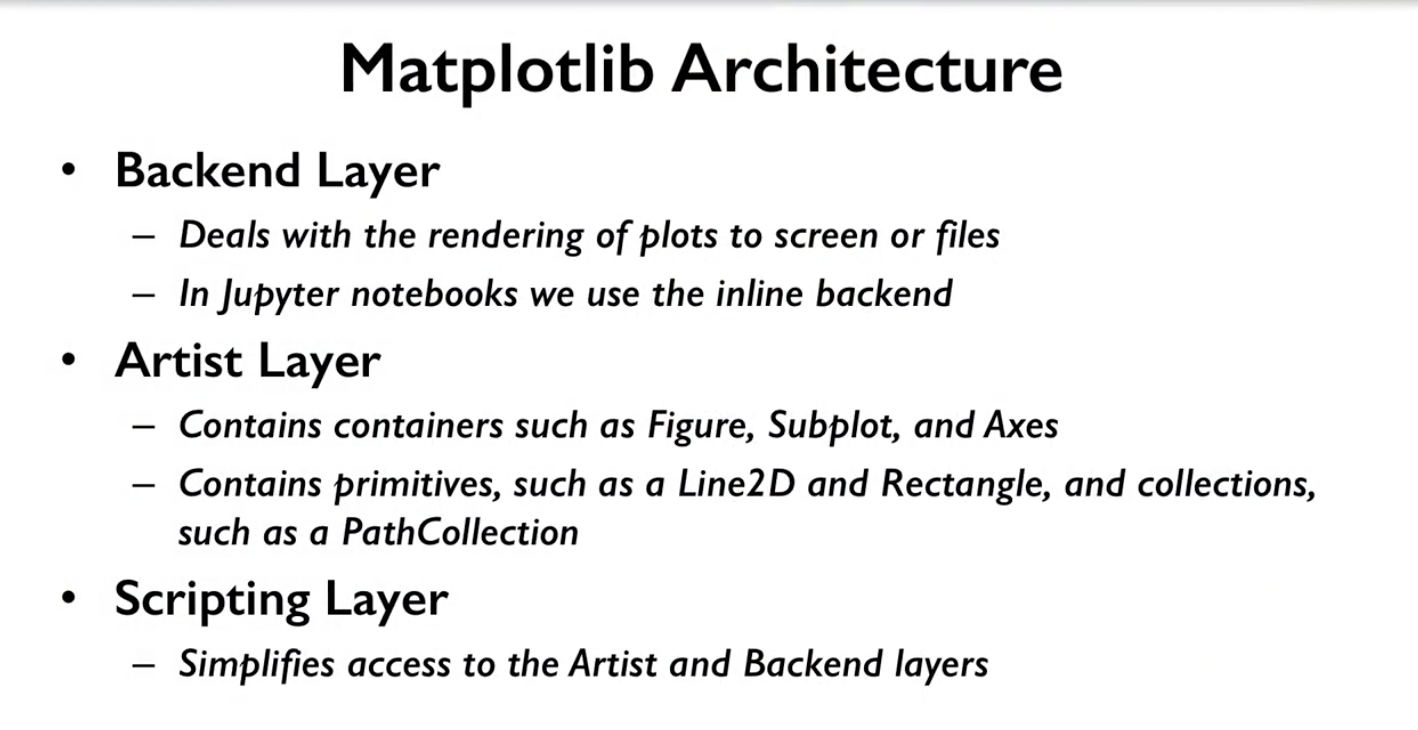

default is the line

only one point will show nothing

<IPython.core.display.Javascript object>


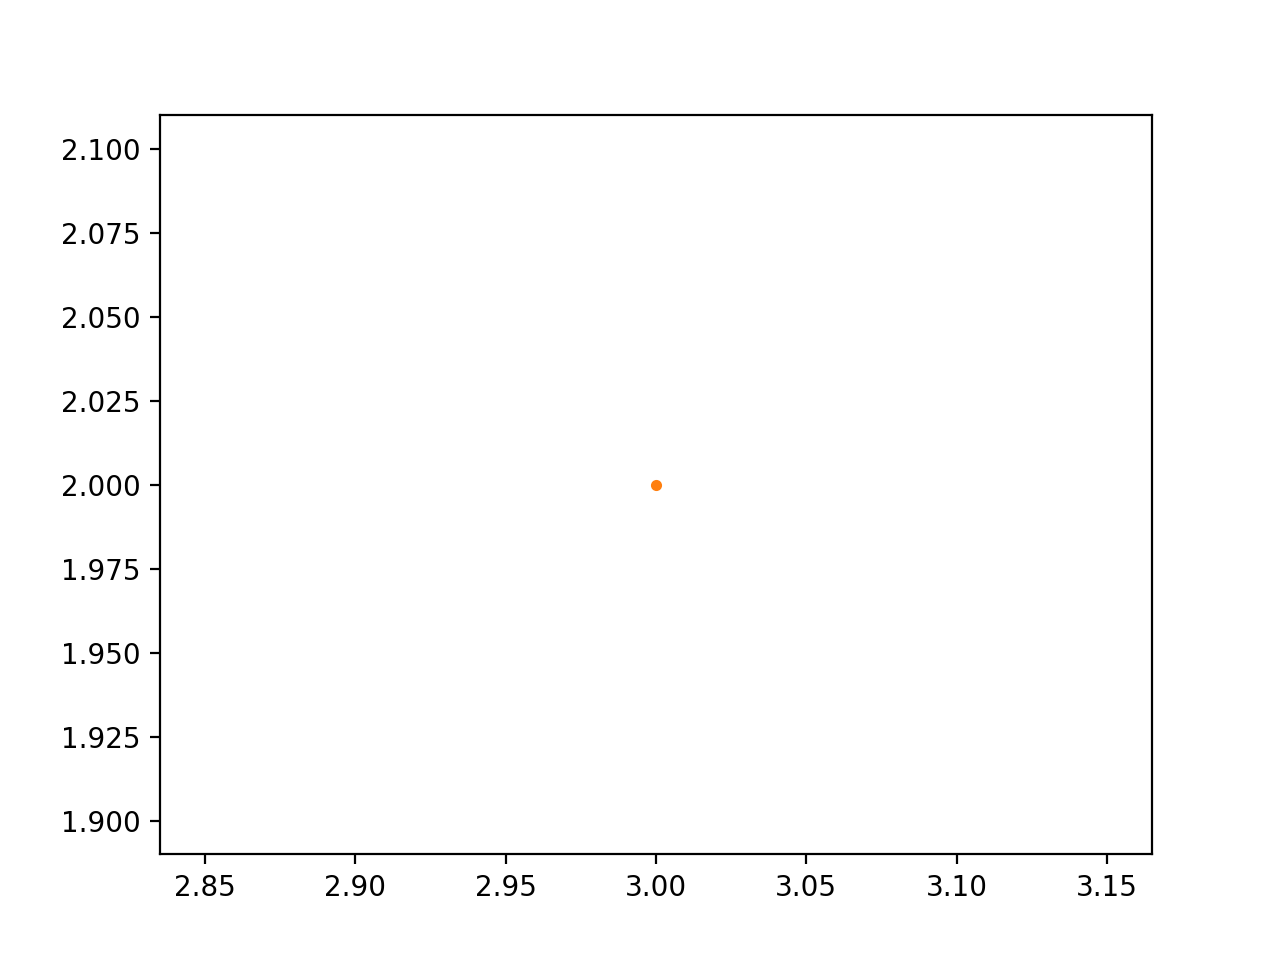

In [9]:
plt.plot(3, 2) #nothing show

In [10]:
plt.plot(3, 2, '.') # add a dot to the previous one 
# a specific feature of the interactive backend

how to make a plot without using the scripting layer

In [13]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

In [14]:
%%html # use html cell magic to display the figure
<img src='test.png' />

<IPython.core.display.Javascript object>


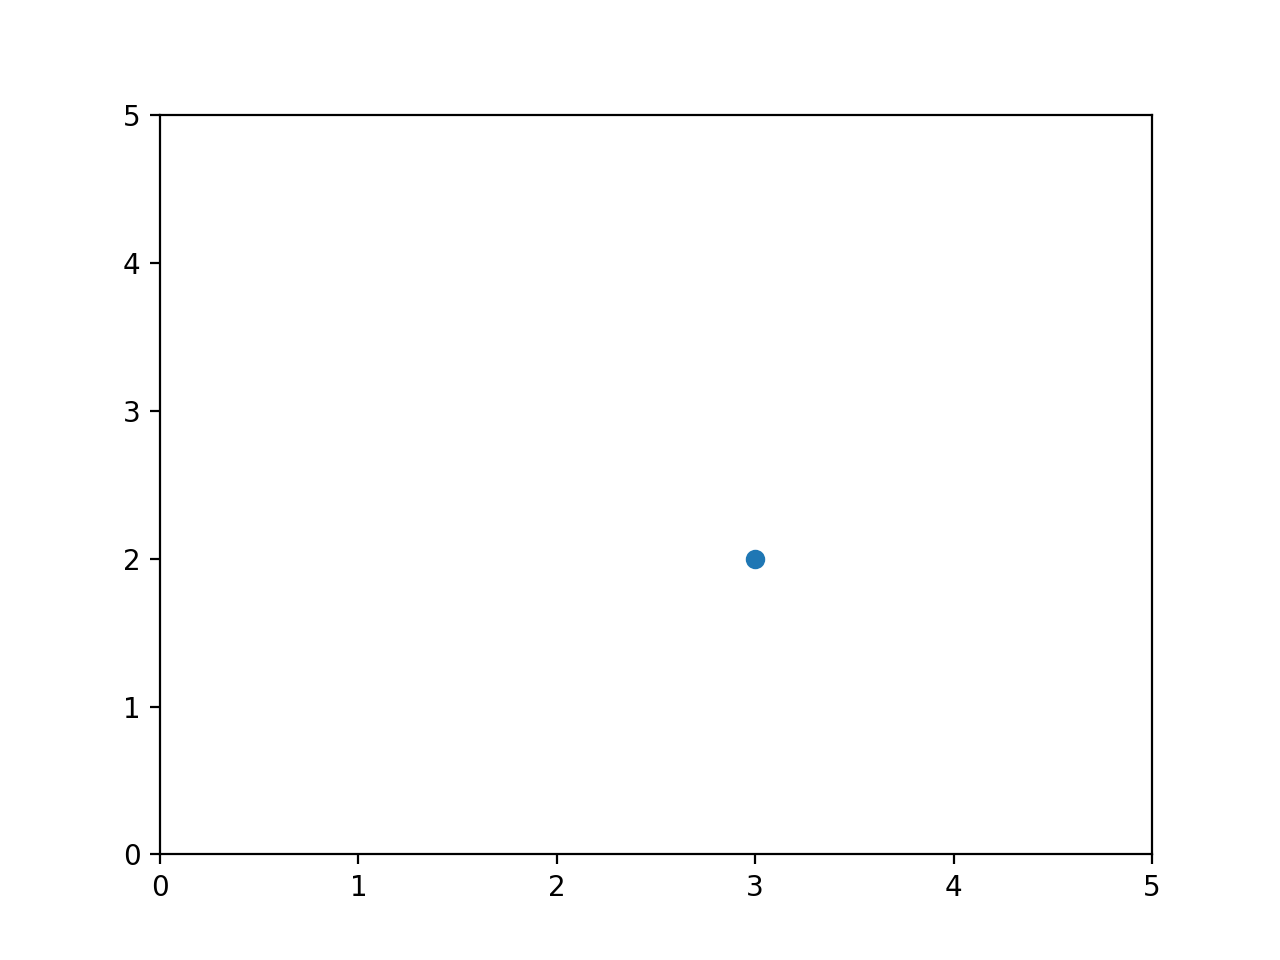

[0, 5, 0, 5]

In [15]:
# creat a new figure
# won't appear in the previous graph like the above one
plt.figure()

plt.plot(3, 2, 'o')

ax = plt.gca() # get the current axes

ax.axis([0, 5, 0, 5]) # Set axis properties [xmin, xmax, ymin, ymax]


<IPython.core.display.Javascript object>


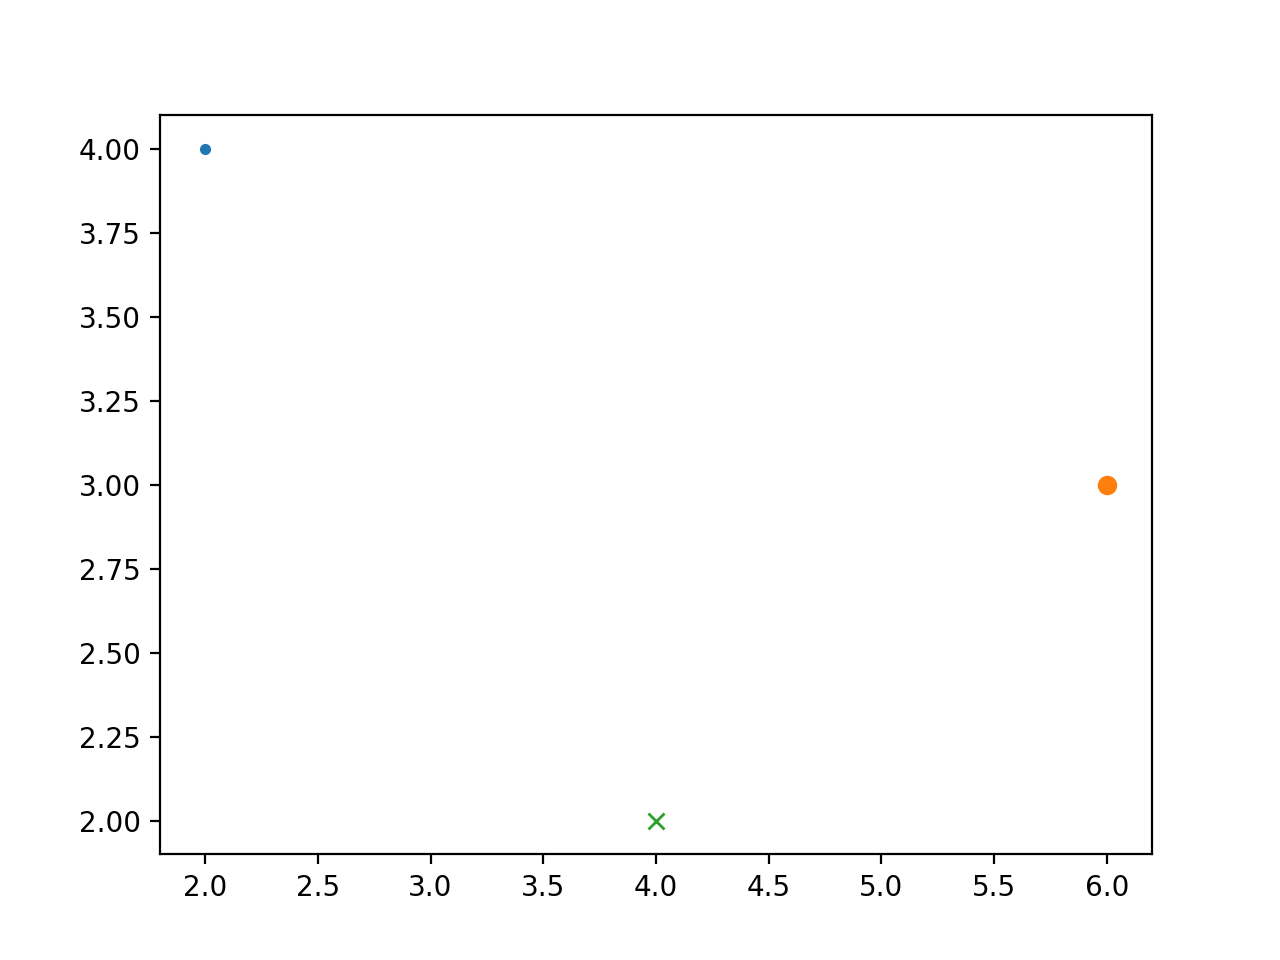

In [17]:
plt.figure()
plt.plot(2, 4, '.')
plt.plot(6, 3, 'o')
plt.plot(4, 2, 'x')

In [18]:
ax = plt.gca()
ax.get_children() # get all of the child objects that the axes contained

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

The above output:

line - data points

spines - borders

text - label

rectangle - background of the axes

###### Scatterplots

<IPython.core.display.Javascript object>


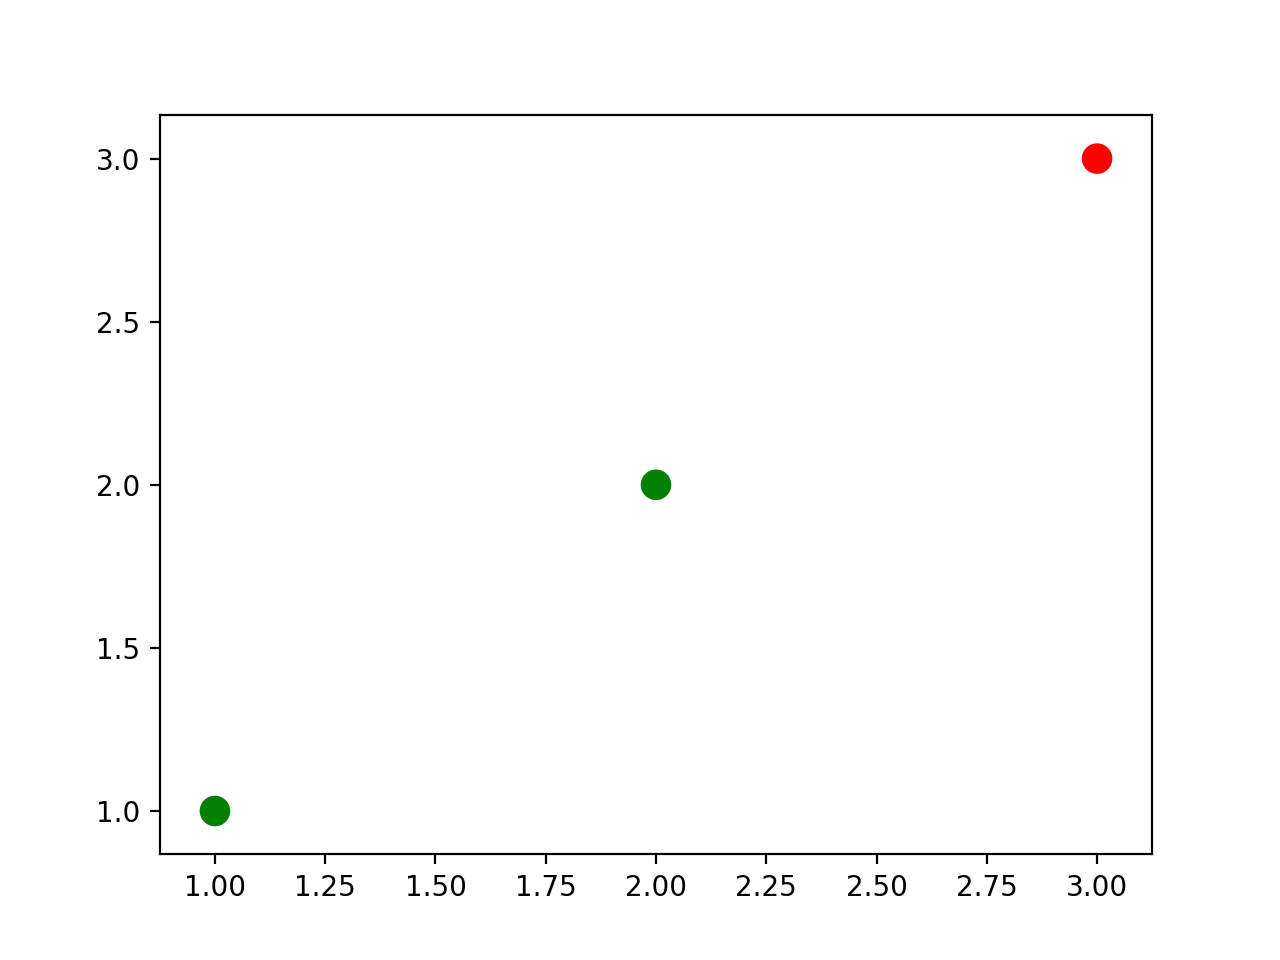

In [14]:
import numpy as np
x = np.array([1, 2, 3])
y = x

plt.figure()
plt.scatter(x, y)
colors = ['green']*(len(x) - 1)
colors.append('red')
plt.scatter(x, y, s= 100, c = colors) # s sets the size and x sets the color

In [17]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
list(zip_generator) # zip could create tuples

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

How to return the original list

In [19]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
x, y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


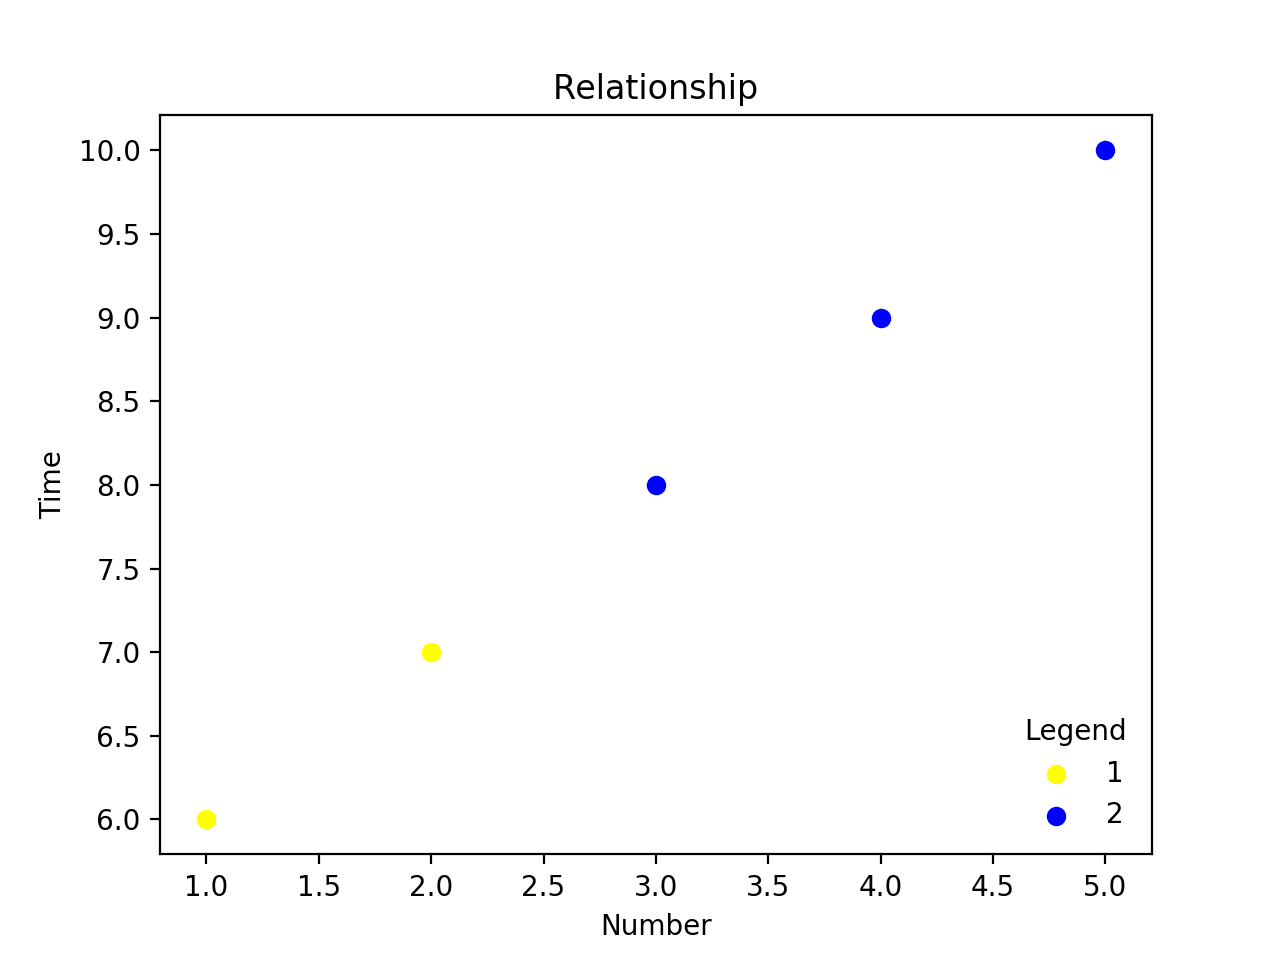

In [22]:
plt.figure()
plt.scatter(x[:2], y[:2], color = 'yellow', label = '1')
plt.scatter(x[2:], y[2:], color = 'blue', label = '2')

In [23]:
plt.xlabel('Number')
plt.ylabel('Time')
plt.title('Relationship')

Text(0.5, 1, 'Relationship')

In [24]:
plt.legend()

In [25]:
plt.legend(loc = 4, frameon = False, title = 'Legend')

In [26]:
plt.gca().get_children()[2]

###### Line Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np


<IPython.core.display.Javascript object>


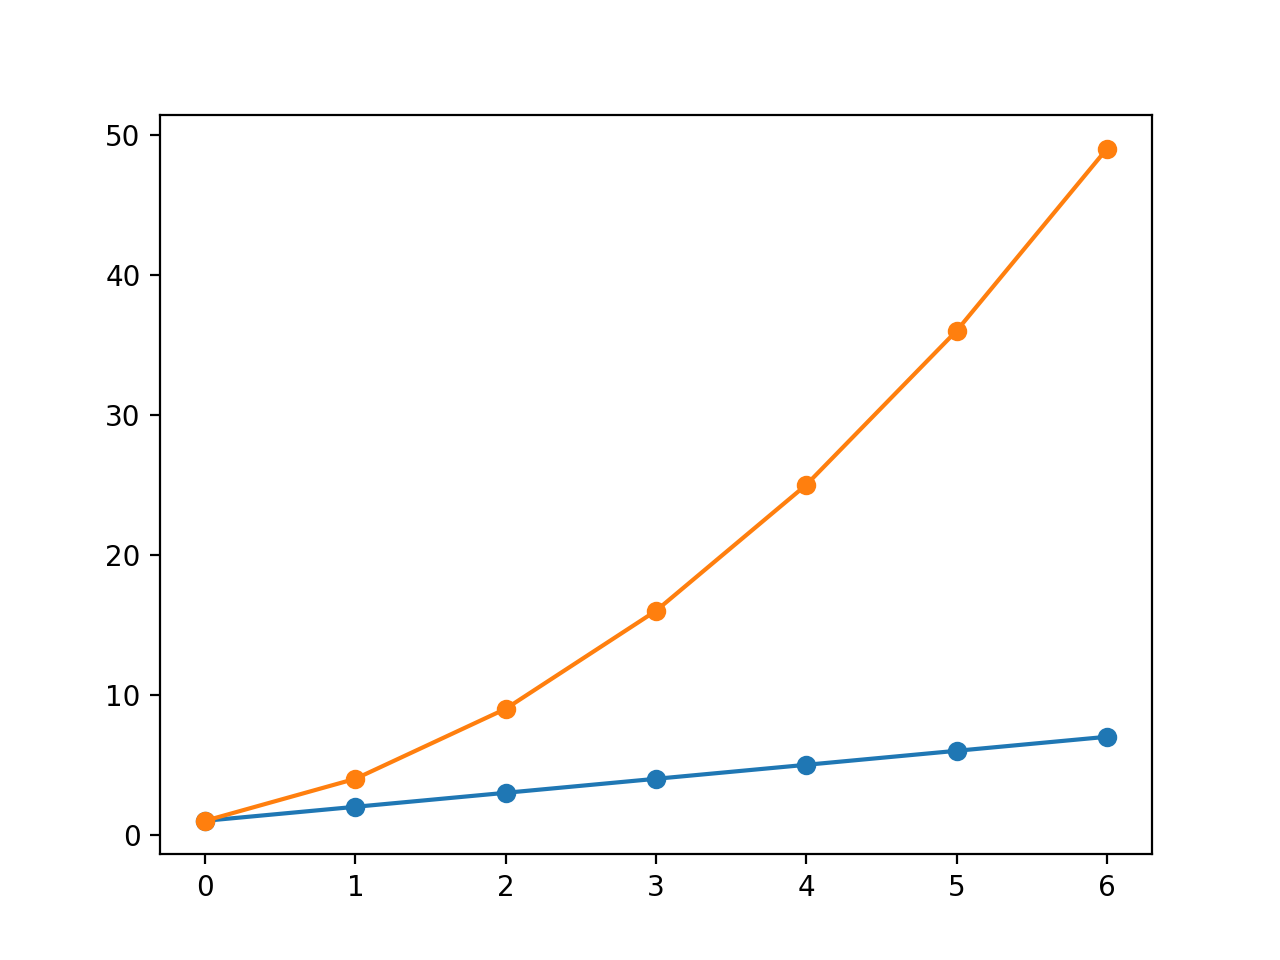

In [9]:
linear_data = np.array([1, 2, 3, 4, 5, 6, 7])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')
# only give the y-axis value, automatic index

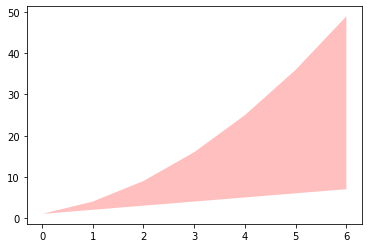

In [6]:
plt.gca().fill_between(range(len(linear_data)), linear_data, quadratic_data, facecolor = 'red', alpha = 0.25)
#range lower bound / upper bound

<IPython.core.display.Javascript object>


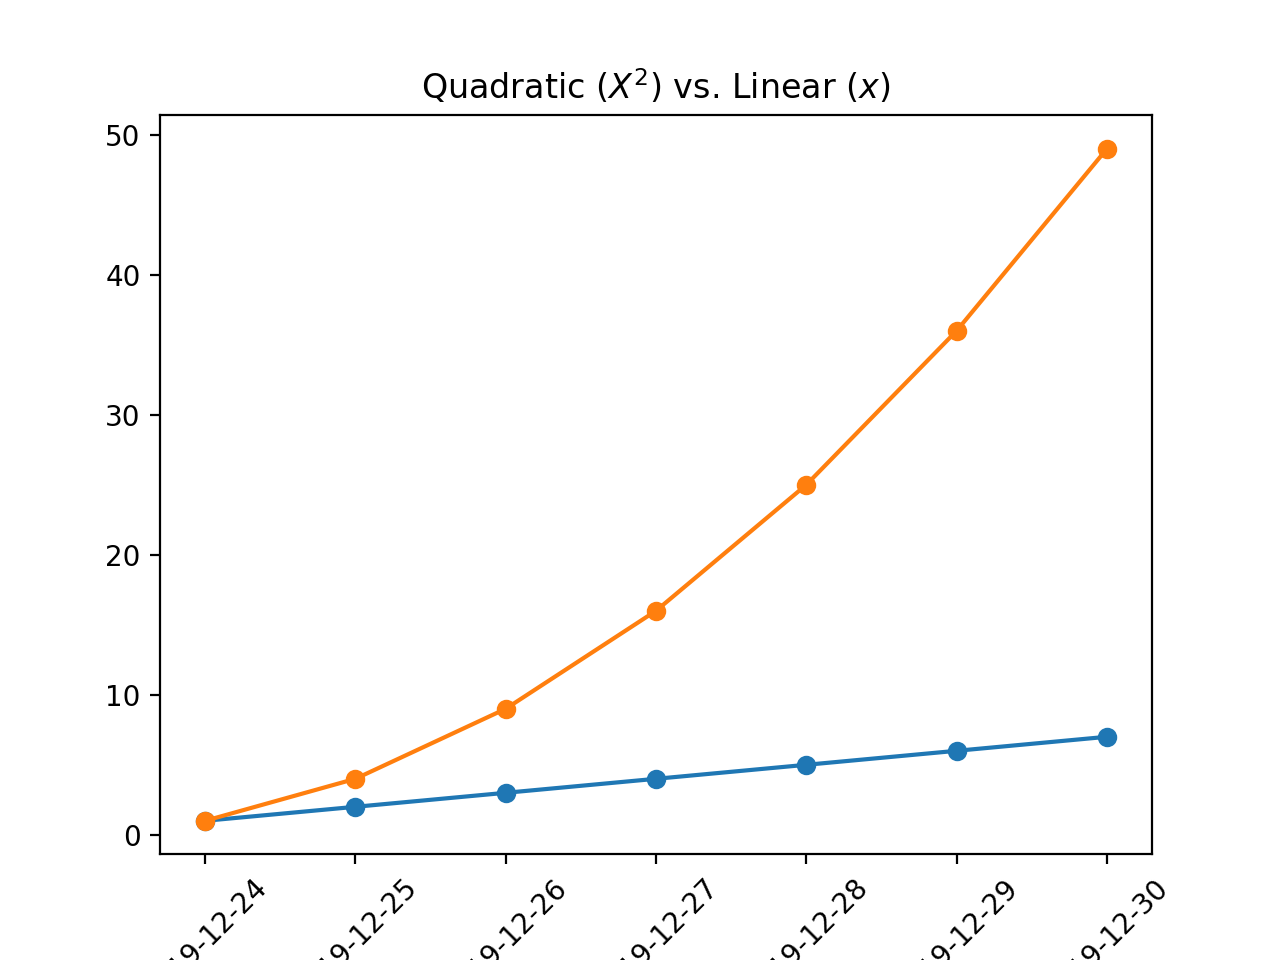

In [21]:
#could get data from arrange and in the datetime format
observation_dates = np.arange('2019-12-24', '2019-12-31', dtype = 'datetime64[D]')
#D means day interval

plt.figure()
plt.plot(observation_dates, linear_data, '-o', observation_dates, quadratic_data, '-o')

In [23]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.gca().set_title("Quadratic ($X^2$) vs. Linear ($x$)") # through latex

Text(0.5, 1, 'Quadratic ($X^2$) vs. Linear ($x$)')

In [19]:
import pandas as pd

observation_dates = np.arange('2019-12-24', '2019-12-31', dtype = 'datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o', observation_dates, quadratic_data, '-o')
# map returns an iterator
# could convert the map result to list but not good

### Bar Charts

<IPython.core.display.Javascript object>


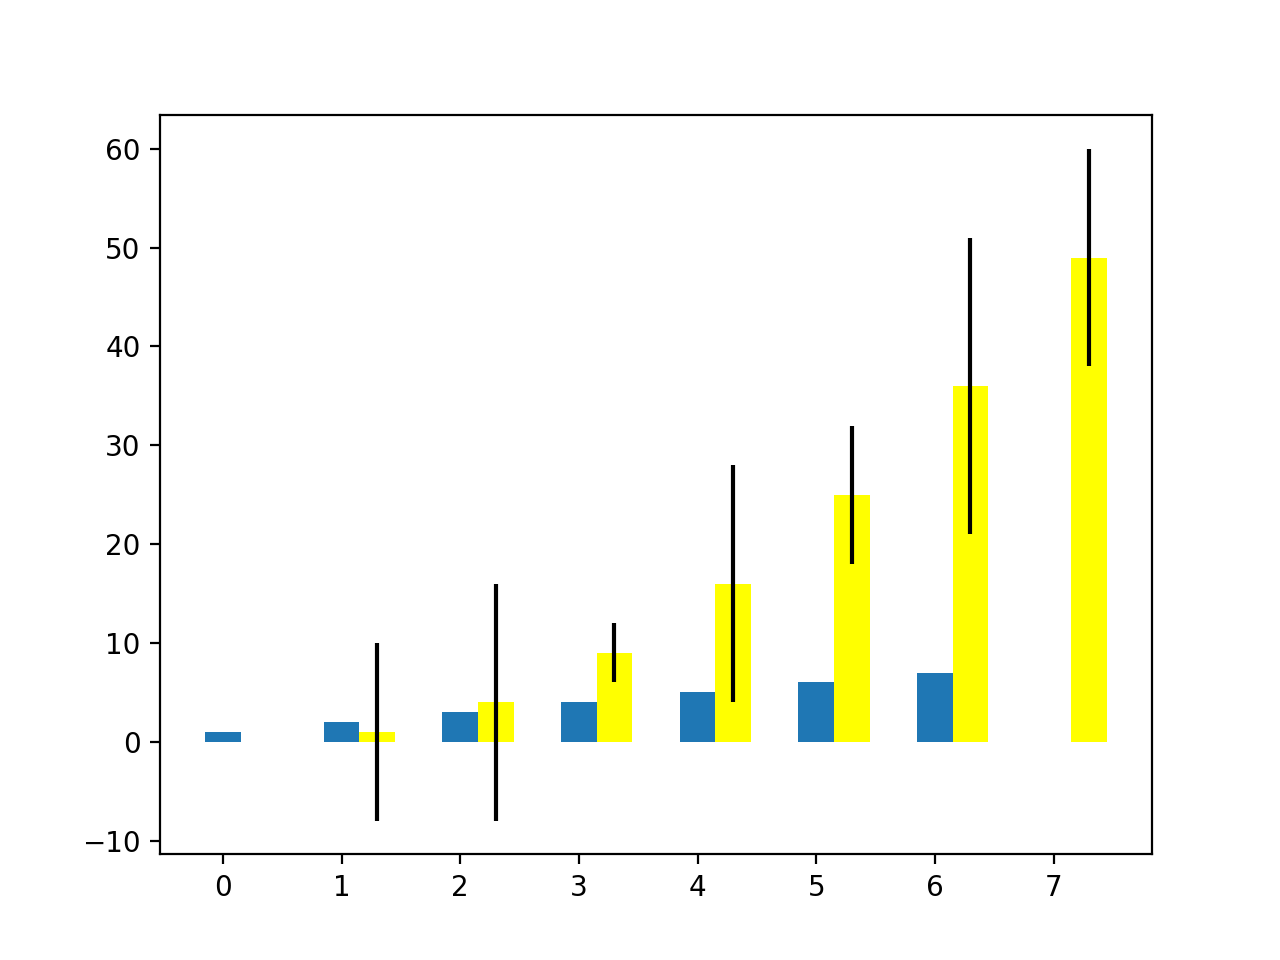

<BarContainer object of 7 artists>

In [24]:
plt.figure()
xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = 0.3)

In [25]:
new_xvals = []
for item in linear_data:
    new_xvals.append(item + 0.3)
    
plt.bar(new_xvals, quadratic_data, color = 'yellow', width = 0.3) # add to the above graph
# but the x-axis not central 

<BarContainer object of 7 artists>

In [26]:
from random import randint
linear_err = [randint(0, 15) for x in range(len(linear_data))] # create error
plt.bar(new_xvals, quadratic_data, color = 'yellow', width = 0.3, yerr = linear_err) # add to the above graph



<BarContainer object of 7 artists>

<IPython.core.display.Javascript object>


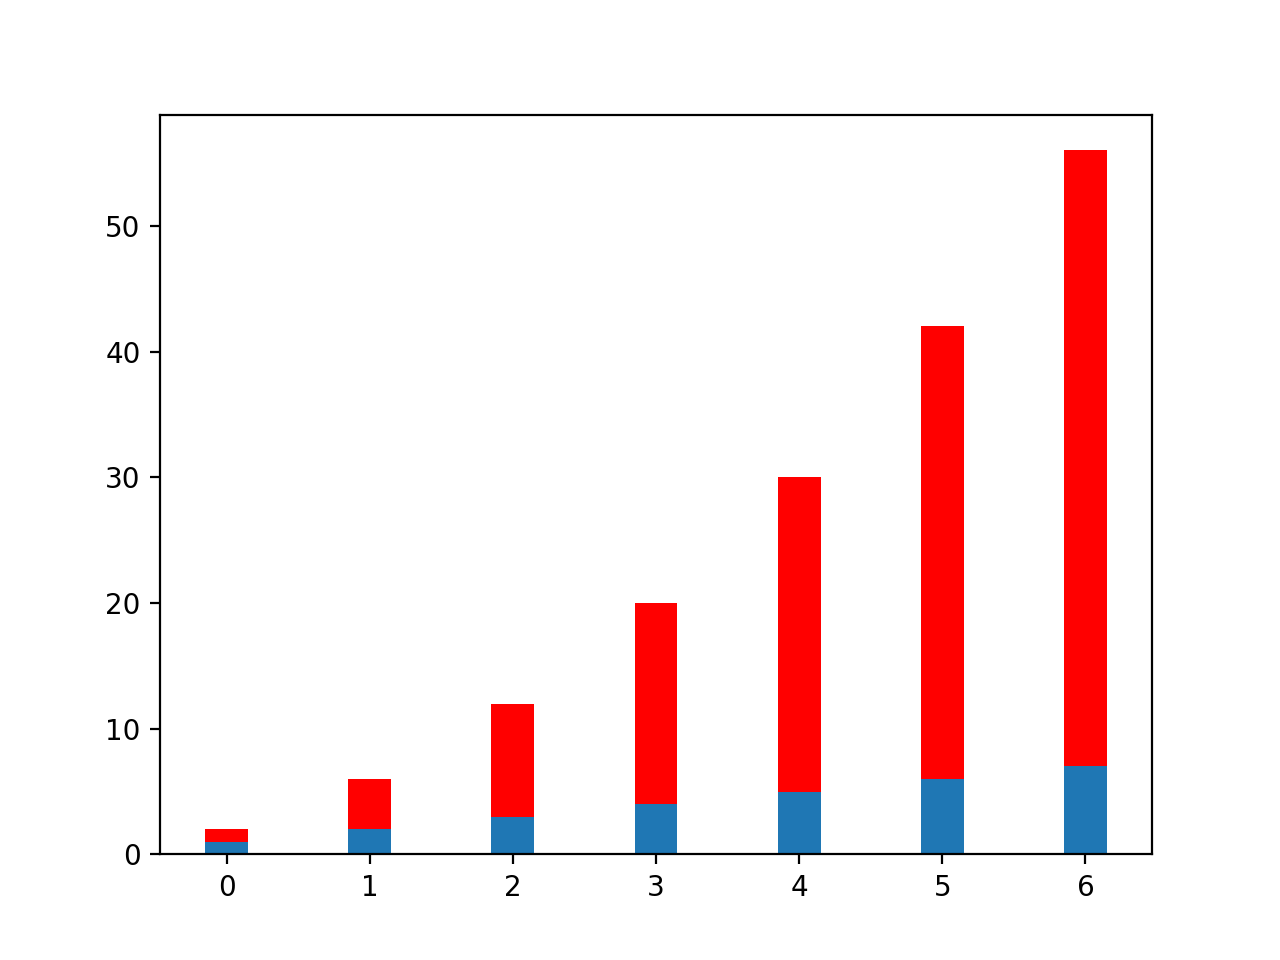

<BarContainer object of 7 artists>

In [27]:
plt.figure()
x_values = range(len(linear_data))
plt.bar(x_values, linear_data, width = 0.3)
plt.bar(x_values, quadratic_data, width = 0.3, bottom = linear_data, color = 'r')
# call barh then horizontal bar chart (exchage x and y axis)

Dejunkifying a plot

<IPython.core.display.Javascript object>


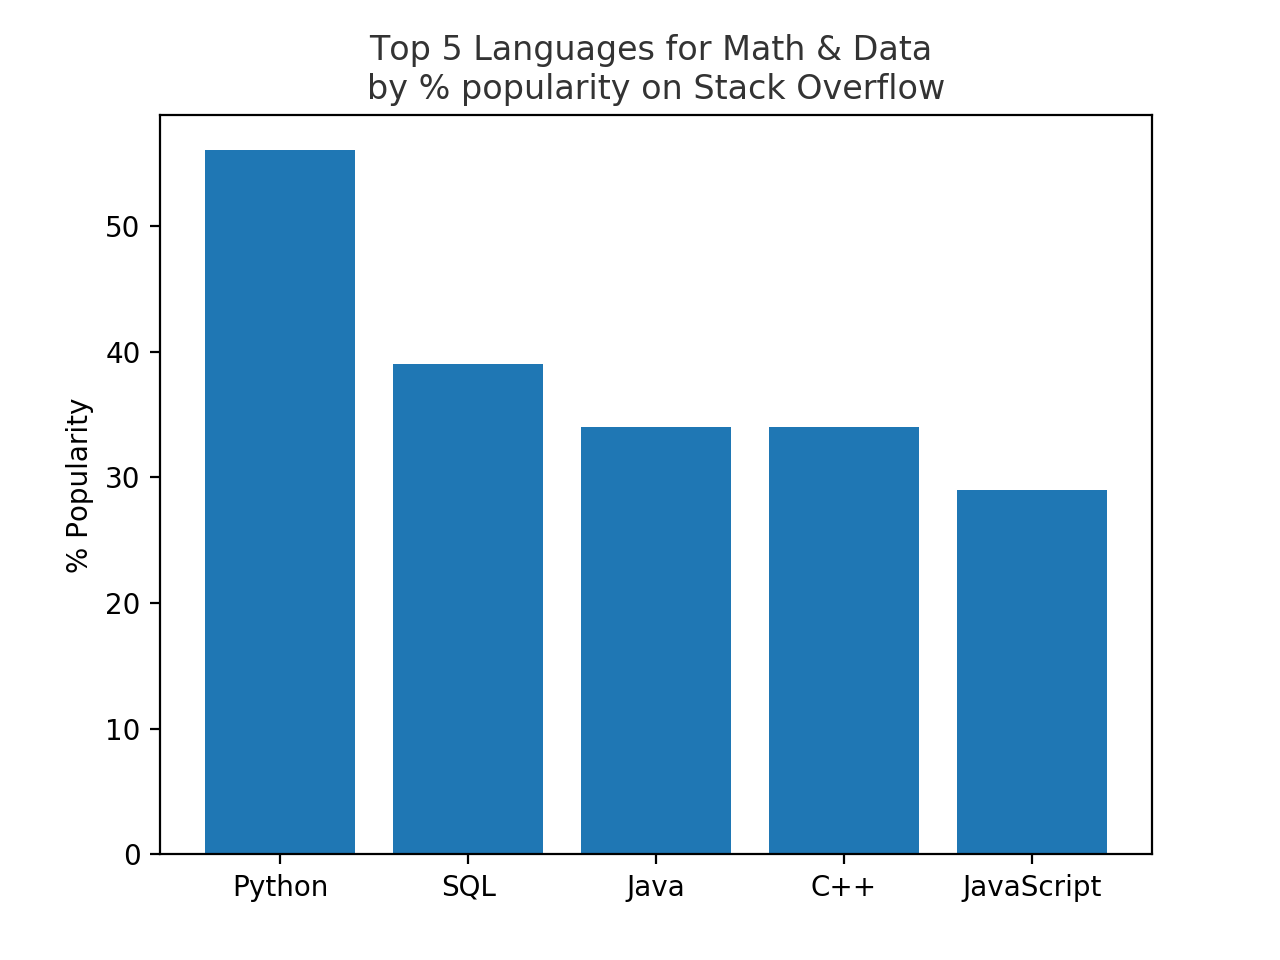

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.show()

In [ ]:
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In [33]:
# TODO: remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

<IPython.core.display.Javascript object>


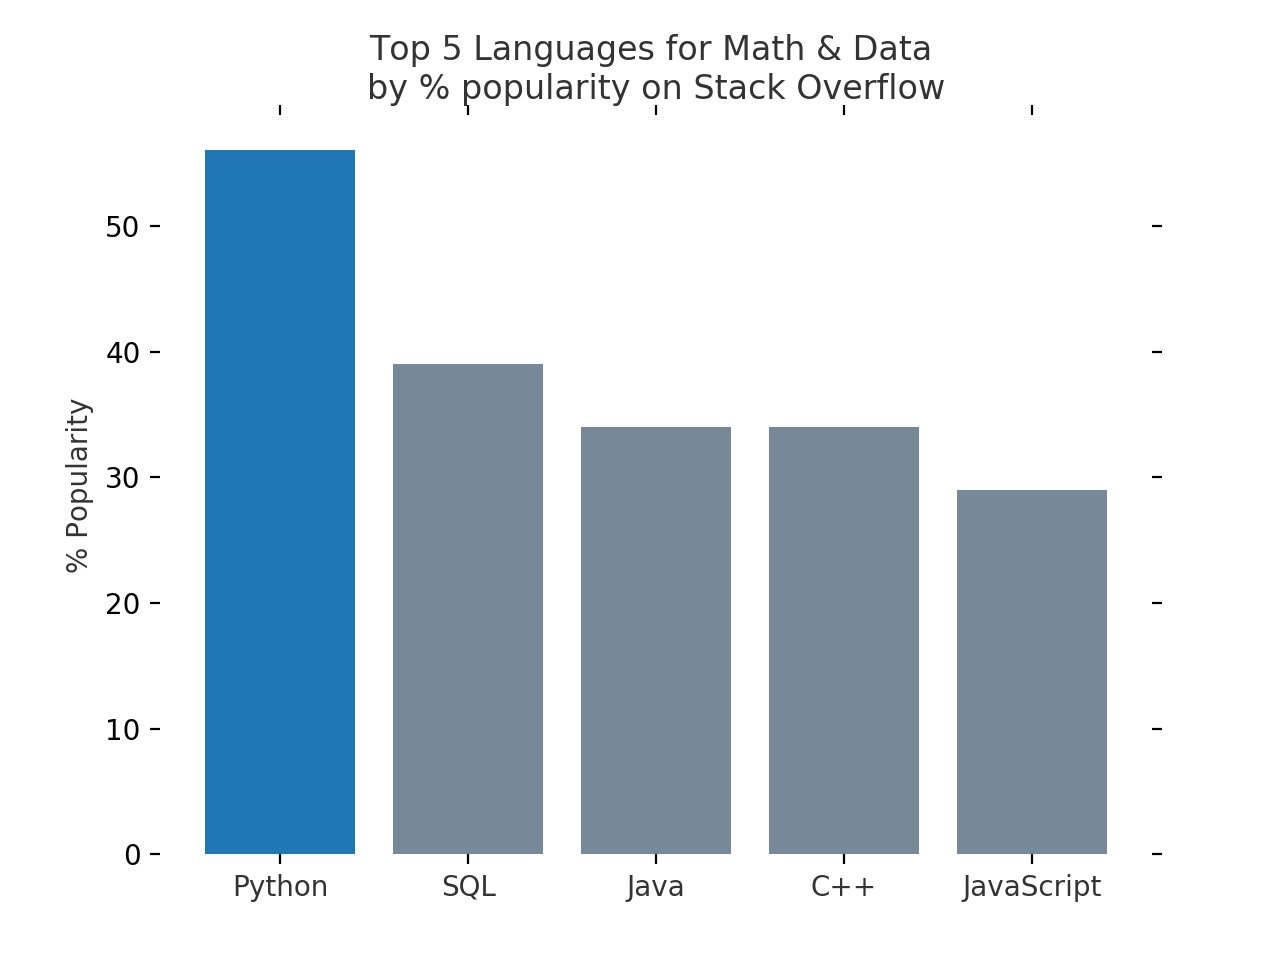

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

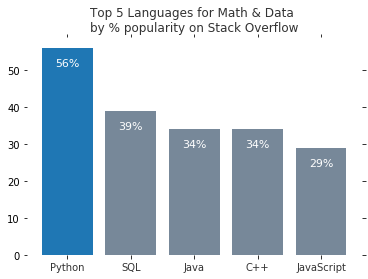

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

##### try on A2

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd



df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date']) 
date = df[(df['Date'] < '2015-01-01') & (df['Date'] > '2005-01-01')]
date['MonthDay'] = date['Date'].apply(lambda x: str(x.month) + '-' + str(x.day))


max_df = date[date['Element'] == 'TMAX']
max_value = max_df.groupby('MonthDay')['Data_Value'].max()
print(max_value)

min_df = date[date['Element'] == 'TMIN']
min_value = min_df.groupby('Date')['Data_Value'].min()


'''
plt.figure()
plt.plot(max_value, '-.', min_value, '-.')'''



ModuleNotFoundError: No module named 'mplleaflet'

### Week3 - Charting Fundamentals

In [37]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

###### subplot

<IPython.core.display.Javascript object>


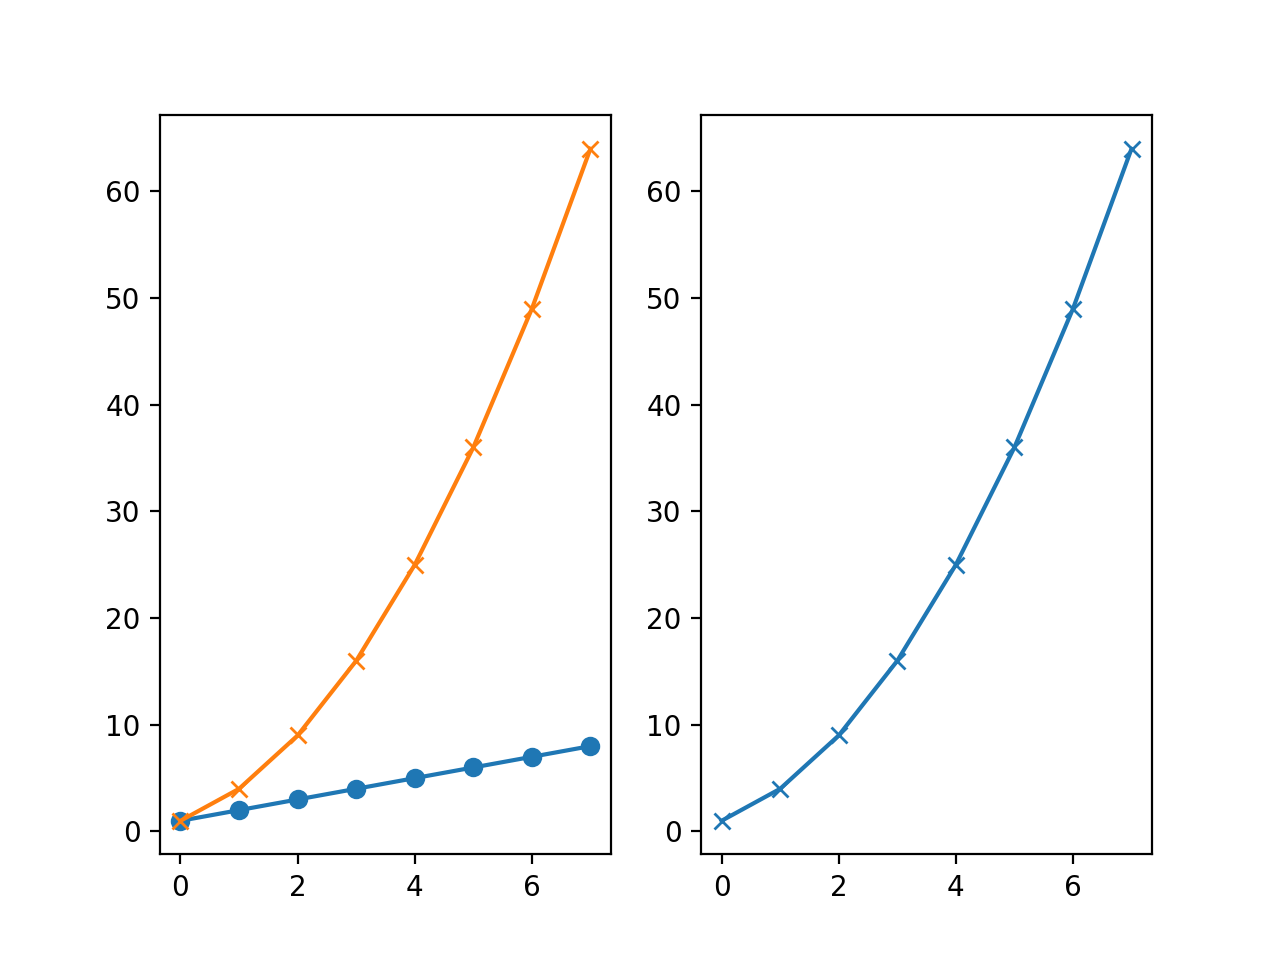

In [38]:
plt.figure()
# 1 row, 2 columns and the current axis is the 1st subplot axes
plt.subplot(1,2,1) 

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [39]:
exponential_data = linear_data**2
plt.subplot(1,2,2)
plt.plot(exponential_data, '-x')

In [40]:
plt.subplot(1,2,1)
plt.plot(exponential_data, '-x') #plot to the first axes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


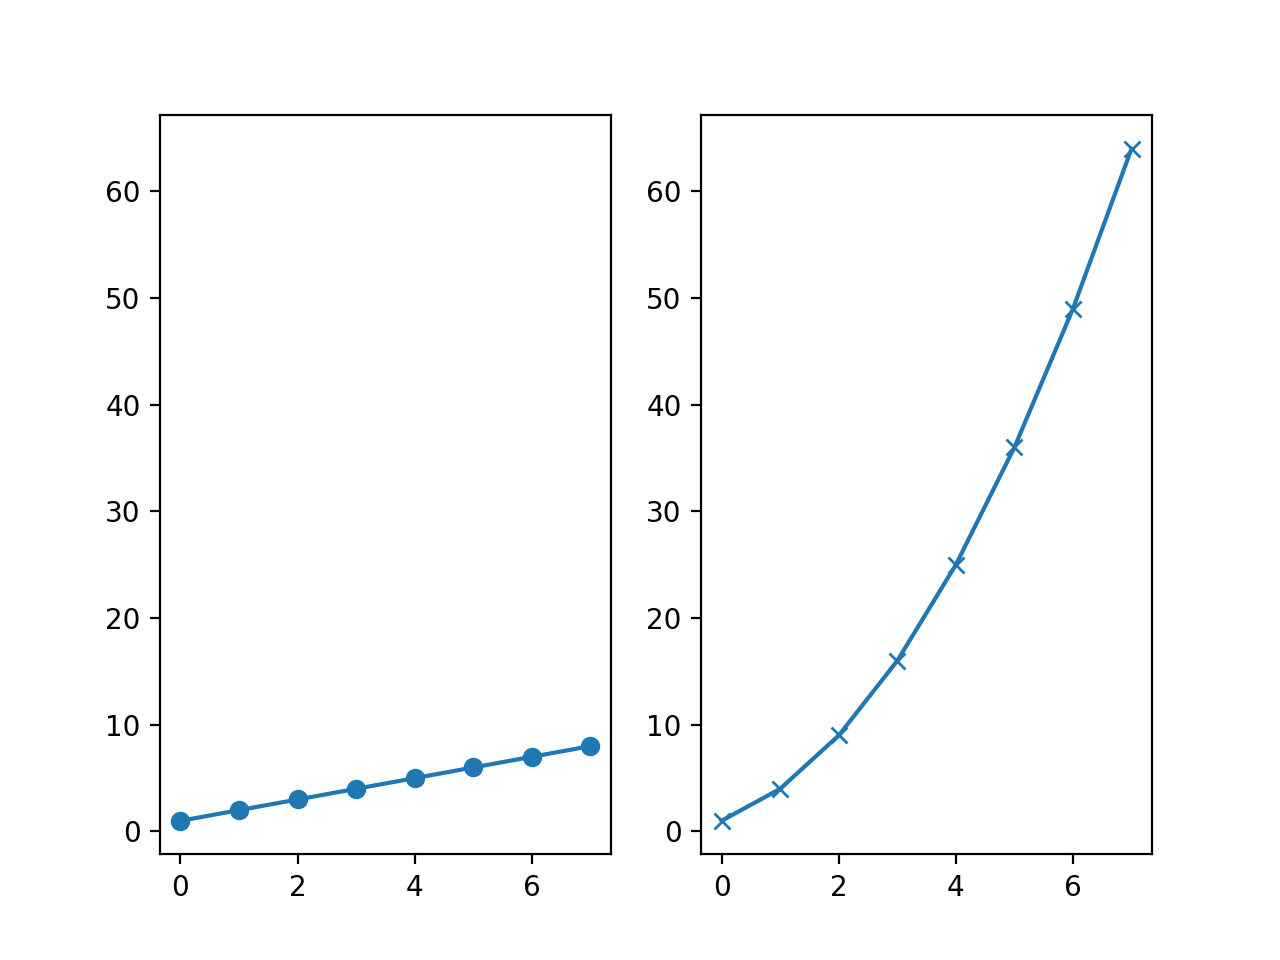

In [41]:
#how to set the axis to be the same
plt.figure()
ax1 = plt.subplot(1, 2, 1) # store the axis object that get back from the subplot
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


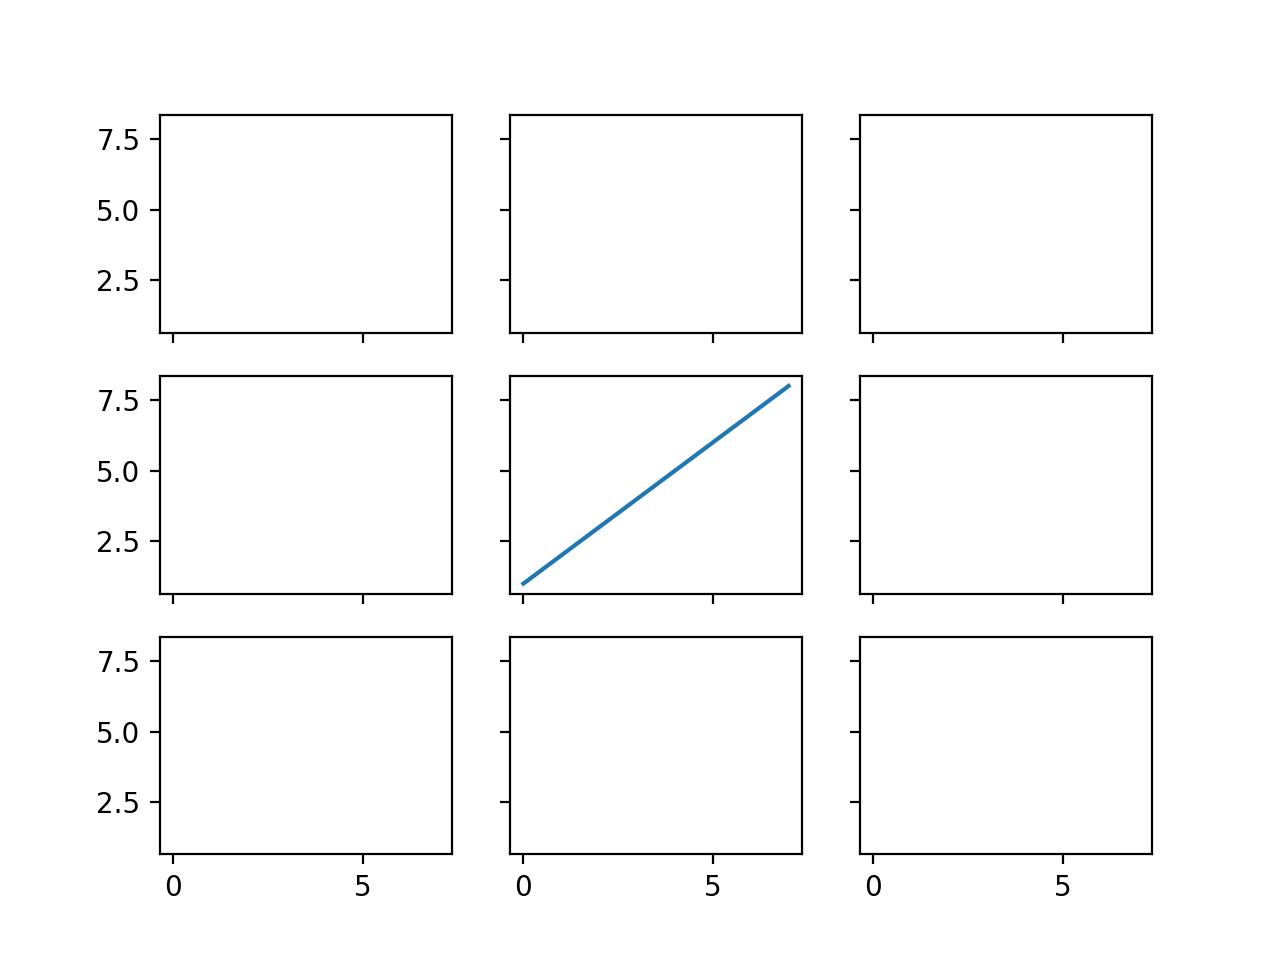

In [52]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# subplots returns a tuple containing a figure and axes object
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [46]:
# use loop to set inside tick labels to be visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [47]:
plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


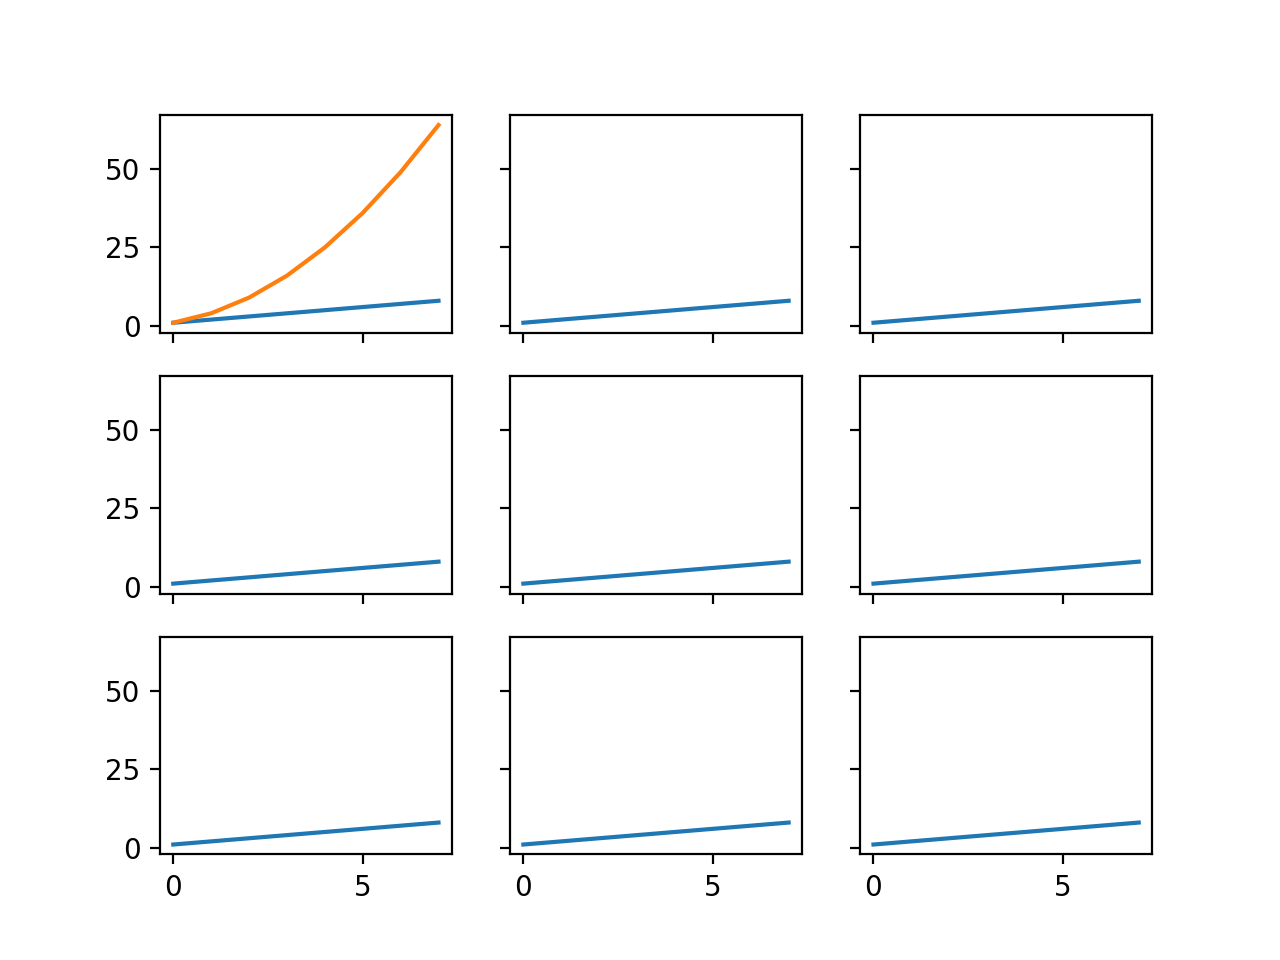

In [53]:
# Try return a tuple of subpots and iterate it over
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
# axs - numpy array

In [54]:
for row in axs:
    for col in row:
        col.plot(linear_data)
plt.show()

In [55]:
axs[0, 0].plot(linear_data**2)

In [48]:
axs[:2, ::2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1169740d0>,
      dtype=object)

###### Histograms

<IPython.core.display.Javascript object>


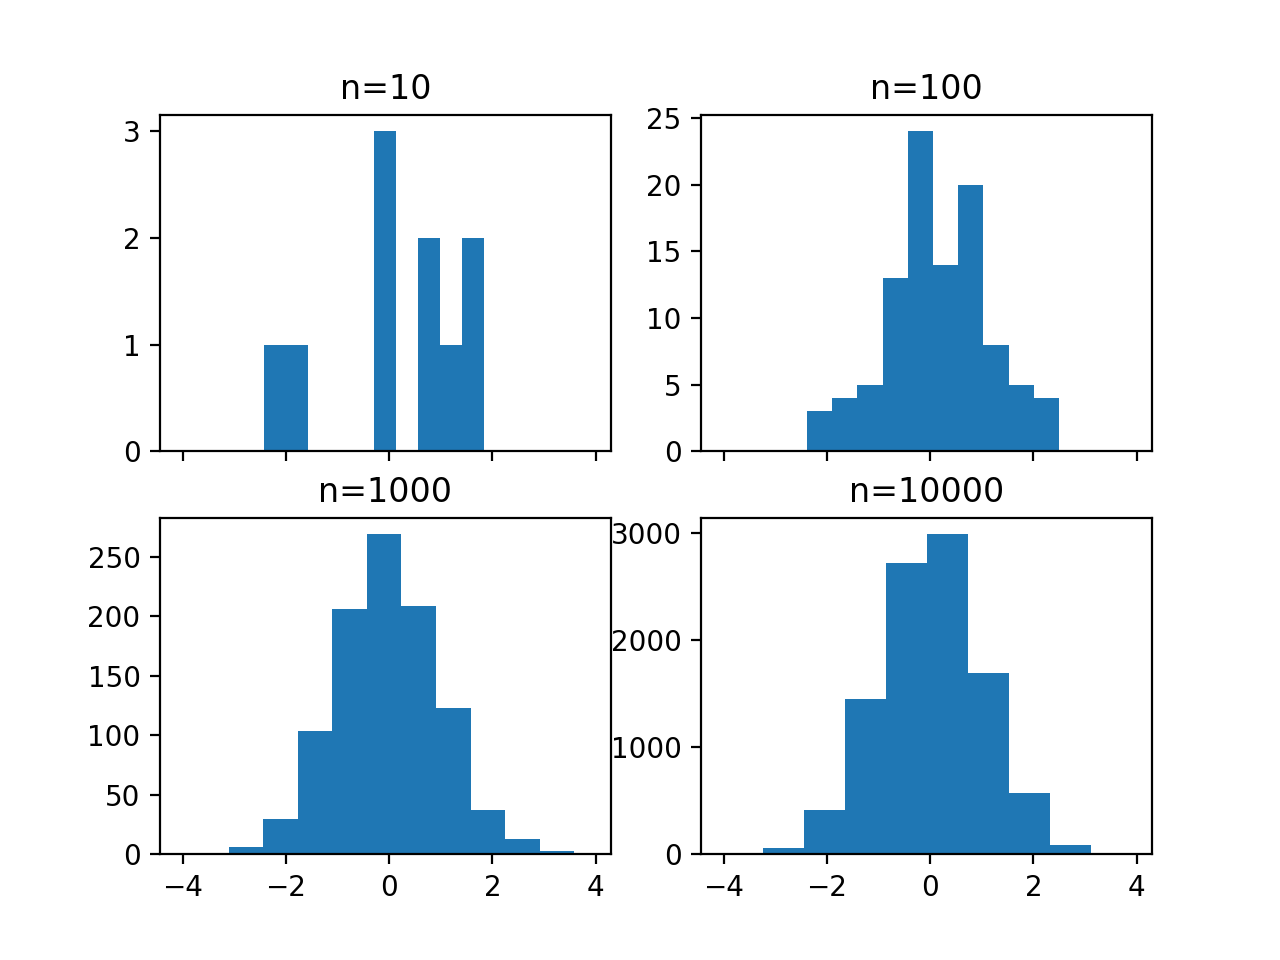

In [10]:
# first create 2*2 grid subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0, len(axs)):
    samplesize = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=samplesize)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(samplesize))

<IPython.core.display.Javascript object>


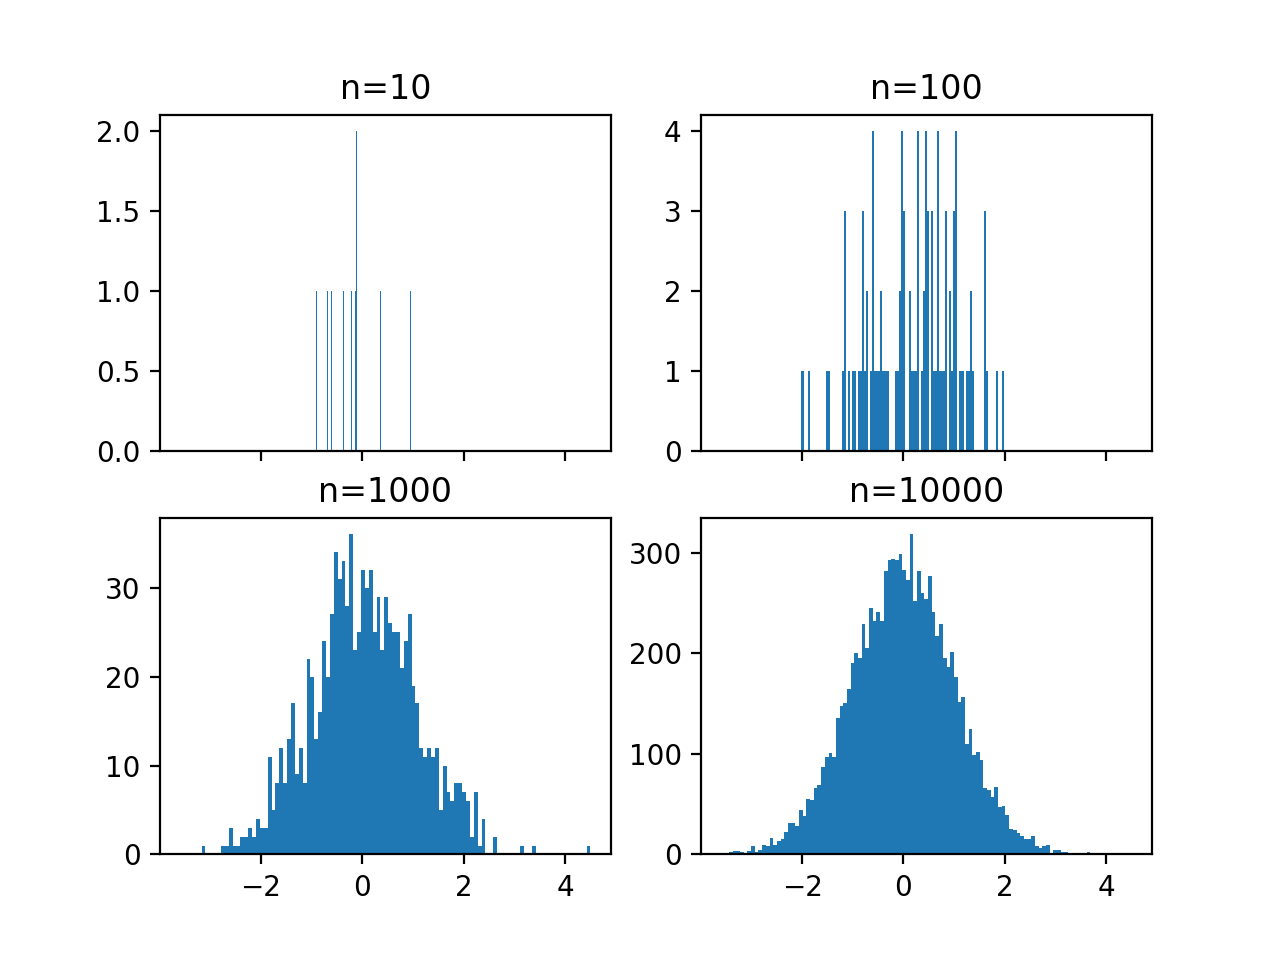

In [13]:
# the default bin is 10, which means 10 different bars
# try bins set to 100
fig,((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0,len(axs)):
    samplesize = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=samplesize)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(samplesize))

<IPython.core.display.Javascript object>


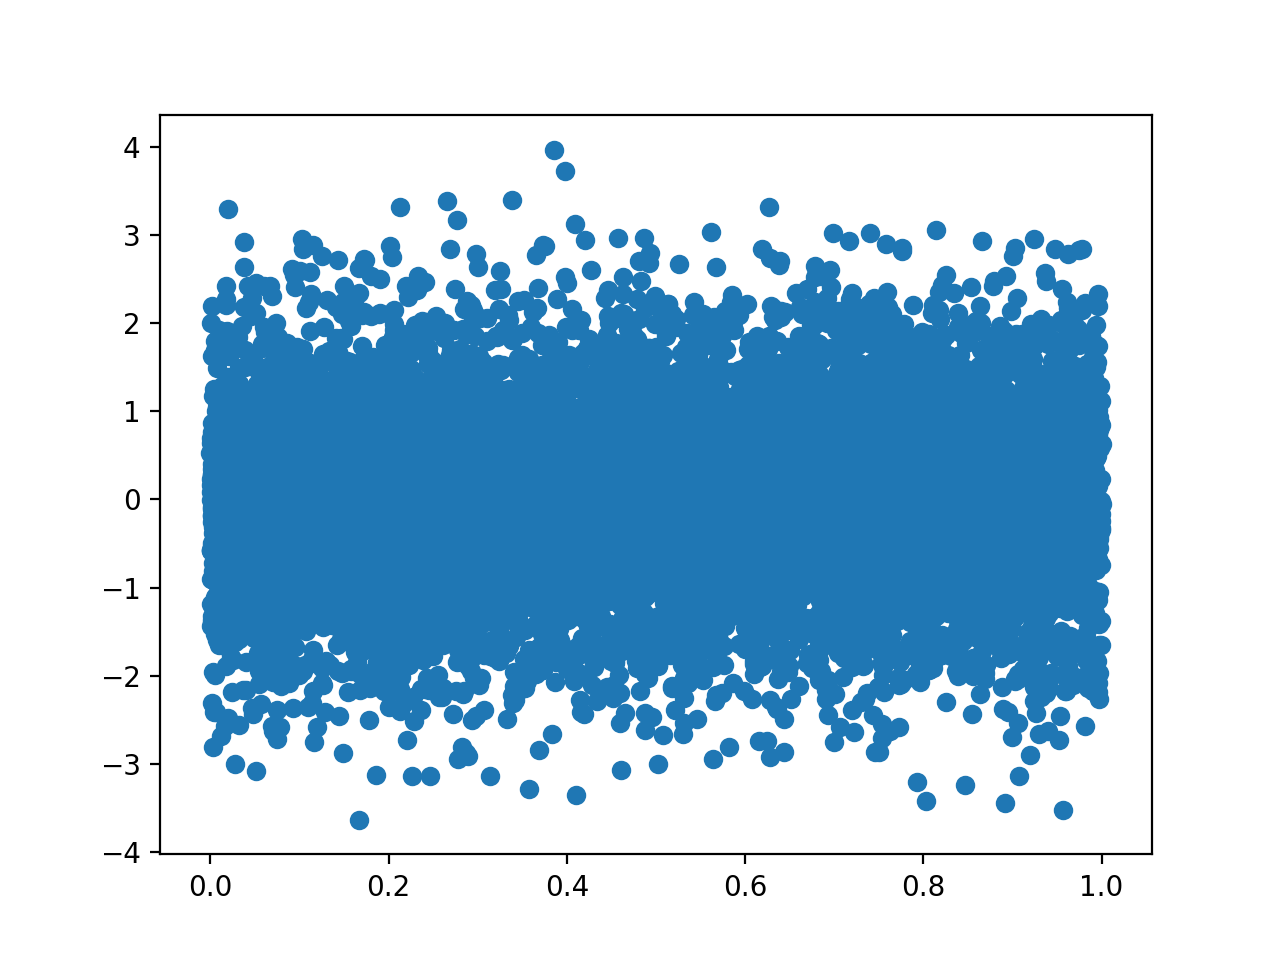

In [14]:
# GridSpec - map axes over multiple cells in a grid
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

For the above figure, add two smaller histograms, for the actual distributions for each axis

<IPython.core.display.Javascript object>


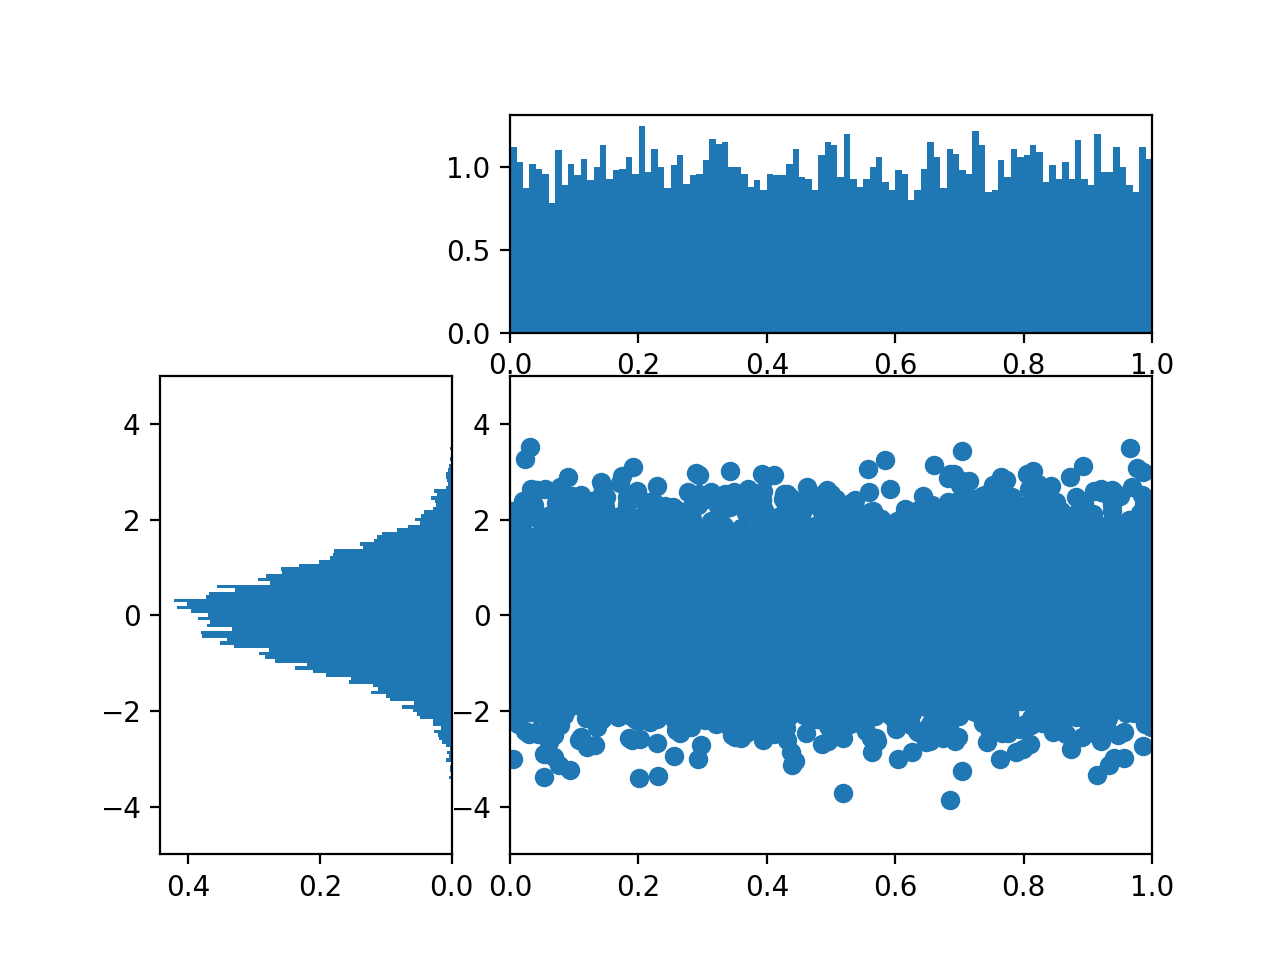

In [20]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)
# define a 3x3 grid, nine cells in total.
# first histogram to take up the top right space
# the second histogram to take up the far left bottom two spaces, rotated on its side.

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [21]:
# Add to the created subplots
Y = np.random.normal(loc=0.0, scale=1.0, size = 10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
side_histogram.hist(Y, bins=100, orientation = 'horizontal')
top_histogram.hist(X, bins = 100)

(array([112., 103.,  87., 102.,  99.,  96.,  78., 110.,  89., 102.,  95.,
        105.,  92., 100., 113.,  93.,  98.,  99., 106.,  96., 125.,  97.,
        111., 100.,  87., 101., 107.,  90.,  95.,  96., 104., 117., 114.,
        115., 100., 100.,  96.,  88.,  92.,  86.,  96.,  95.,  95., 102.,
        111.,  94.,  93.,  86., 107., 115., 113.,  94., 120.,  93.,  88.,
         93., 100., 106.,  91.,  86.,  98.,  96.,  80.,  86.,  99., 115.,
        106.,  87., 111., 108.,  98.,  96., 122., 113.,  85.,  86., 104.,
         94., 111., 106., 107., 113., 109.,  91., 101.,  93., 103.,  93.,
        116.,  93.,  89., 120.,  97.,  97., 112., 100.,  89.,  85., 112.,
        105.]),
 array([8.75604318e-05, 1.00858813e-02, 2.00842021e-02, 3.00825230e-02,
        4.00808439e-02, 5.00791647e-02, 6.00774856e-02, 7.00758064e-02,
        8.00741273e-02, 9.00724482e-02, 1.00070769e-01, 1.10069090e-01,
        1.20067411e-01, 1.30065732e-01, 1.40064052e-01, 1.50062373e-01,
        1.60060694e-01, 1.7005

In [22]:
# we could clear a sigle subplot
top_histogram.clear()
top_histogram.hist(X, bins = 100, normed = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([1.1201881 , 1.03017298, 0.87014611, 1.0201713 , 0.99016626,
        0.96016122, 0.780131  , 1.10018474, 0.89014947, 1.0201713 ,
        0.95015955, 1.05017634, 0.92015451, 1.00016794, 1.13018977,
        0.93015619, 0.98016458, 0.99016626, 1.06017802, 0.96016122,
        1.25020993, 0.9701629 , 1.11018642, 1.00016794, 0.87014611,
        1.01016962, 1.0701797 , 0.90015115, 0.95015955, 0.96016122,
        1.04017466, 1.17019649, 1.14019145, 1.15019313, 1.00016794,
        1.00016794, 0.96016122, 0.88014779, 0.92015451, 0.86014443,
        0.96016122, 0.95015955, 0.95015955, 1.0201713 , 1.11018642,
        0.94015787, 0.93015619, 0.86014443, 1.0701797 , 1.15019313,
        1.13018977, 0.94015787, 1.20020153, 0.93015619, 0.88014779,
        0.93015619, 1.00016794, 1.06017802, 0.91015283, 0.86014443,
        0.98016458, 0.96016122, 0.80013435, 0.86014443, 0.99016626,
        1.15019313, 1.06017802, 0.87014611, 1.11018642, 1.08018138,
        0.98016458, 0.96016122, 1.22020489, 1.13

In [23]:
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


In [24]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

### Box Plots

method to show aggregate statistics of various samples in a concise matter

shows the median of each value, minimum and maximum of each sample, interquartile range

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal':normal_sample, 'random':random_sample, 'gamma':gamma_sample})

In [26]:
df.describe()

normal        random         gamma
count  10000.000000  10000.000000  10000.000000
mean       0.000052      0.502281      2.019783
std        1.001615      0.288099      1.412637
min       -3.827954      0.000004      0.014107
25%       -0.692584      0.252411      0.970222
50%       -0.006420      0.503143      1.705225
75%        0.675385      0.751633      2.741472
max        3.521309      0.999936     11.954533

<IPython.core.display.Javascript object>


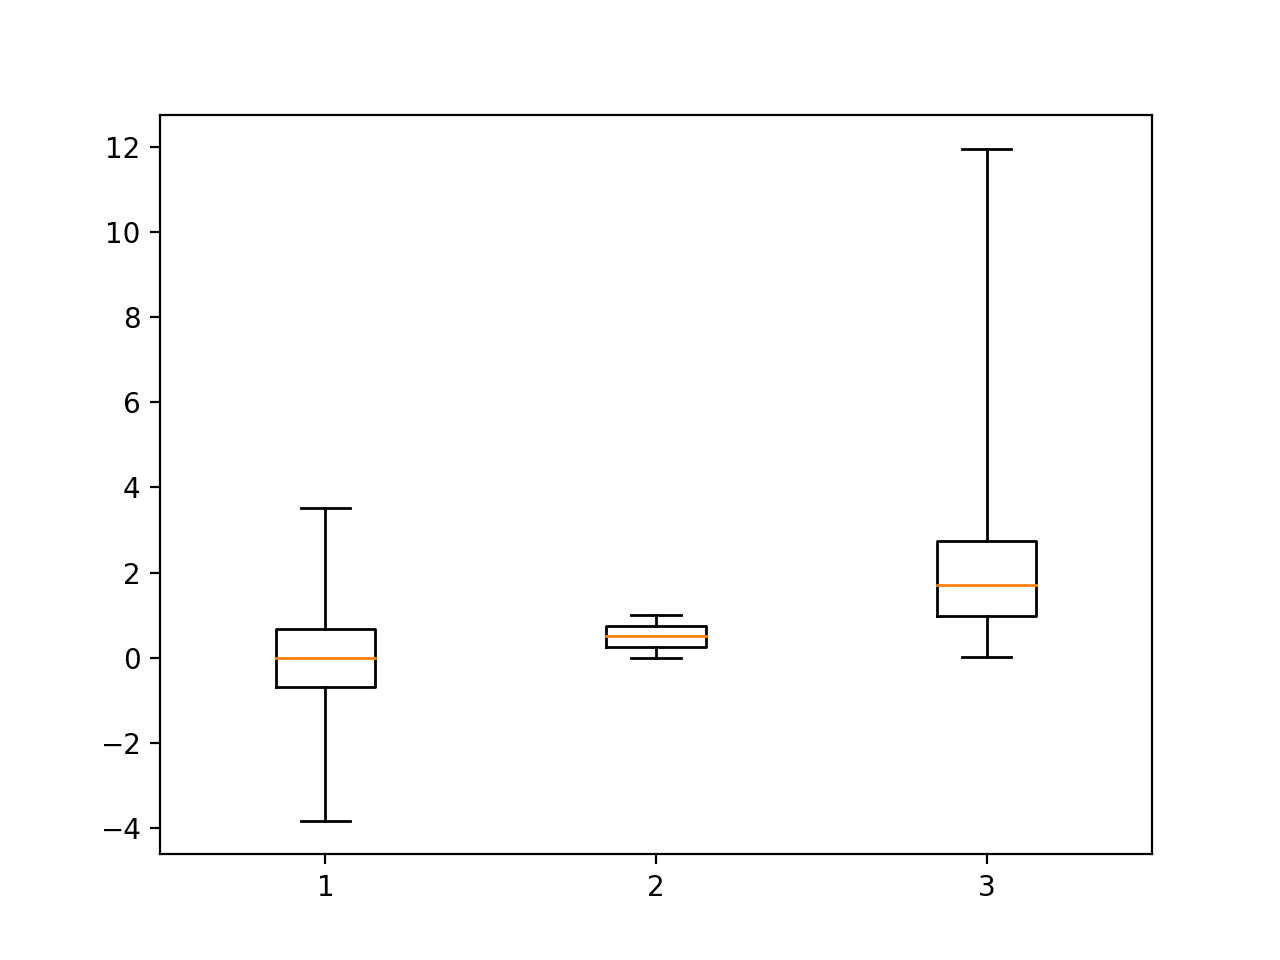

In [27]:
plt.figure()
_=plt.boxplot(df['normal'], whis='range') # _just means u want to output this figure

In [28]:
plt.clf() # clear current figure
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

<IPython.core.display.Javascript object>


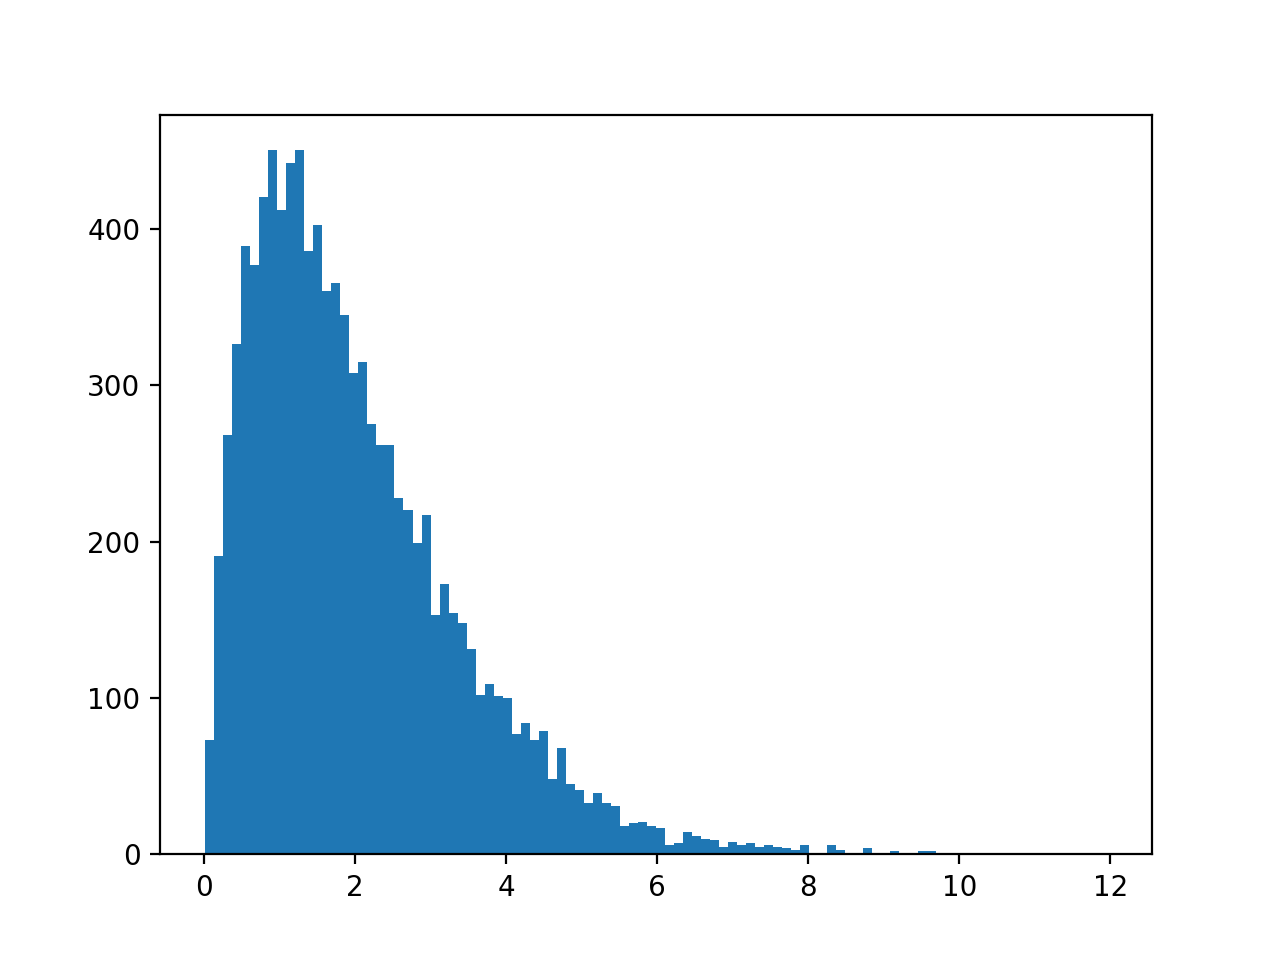

In [29]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

how to plot the above two figures together

<IPython.core.display.Javascript object>


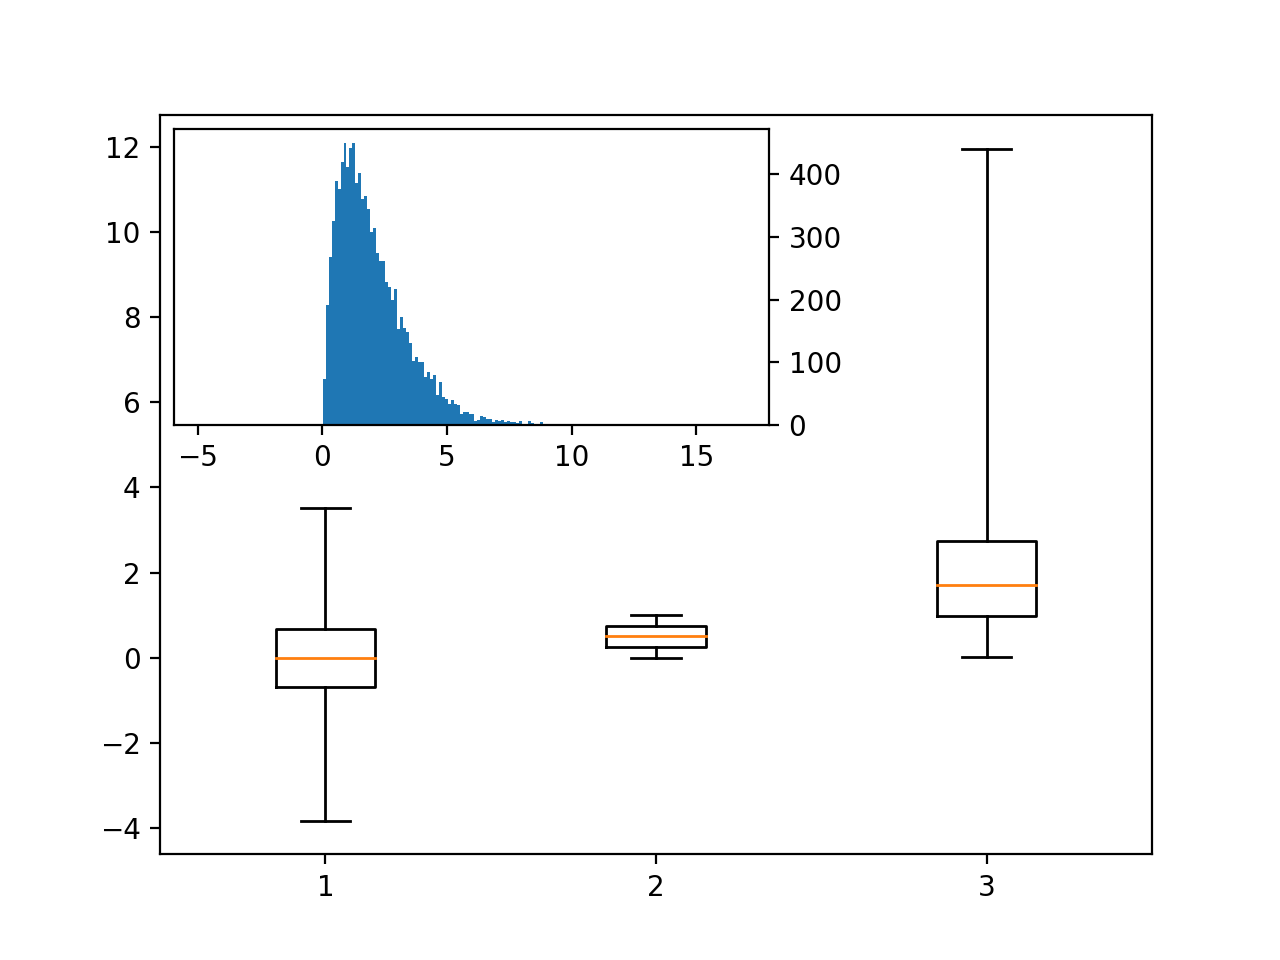

In [31]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma']], whis='range')
#overlay axis on top of another
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2) # loc=2 is top-left location
# get the ax2 to plot the histogram in that place
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [32]:
ax2.yaxis.tick_right()

### Animation

In [11]:
import matplotlib.animation as animation

# to call FuncAnimation - builds an animation by iteratively calling a function 
# the funvtion will 1. clear teh axis object and redraw the next frame or 2. return a list of objects which need to be redrawn


show how the histogram is built from one sample through 100 samples

In [12]:
n = 100
x = np.random.randn(n) # creates an array of specified shape(100), filled with random floats as per standard normal distribution

In [24]:
# the function will do plotting
def update(curr): #curr is the current figure
    # if it is the last frame, stop the animation a (a is the FuncAnimation object)
    if (curr == n):
        a.event_source.stop()
    plt.cla() # clear current axis
    bins = np.arange(-4, 4, 0.5) # ensure the bins set and evenlt spaced, or the number fill in one bin would change(with an exact number of bins)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30]) # no set -> autoscale the axis all time
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27]) # place text at a certain place
    

<IPython.core.display.Javascript object>


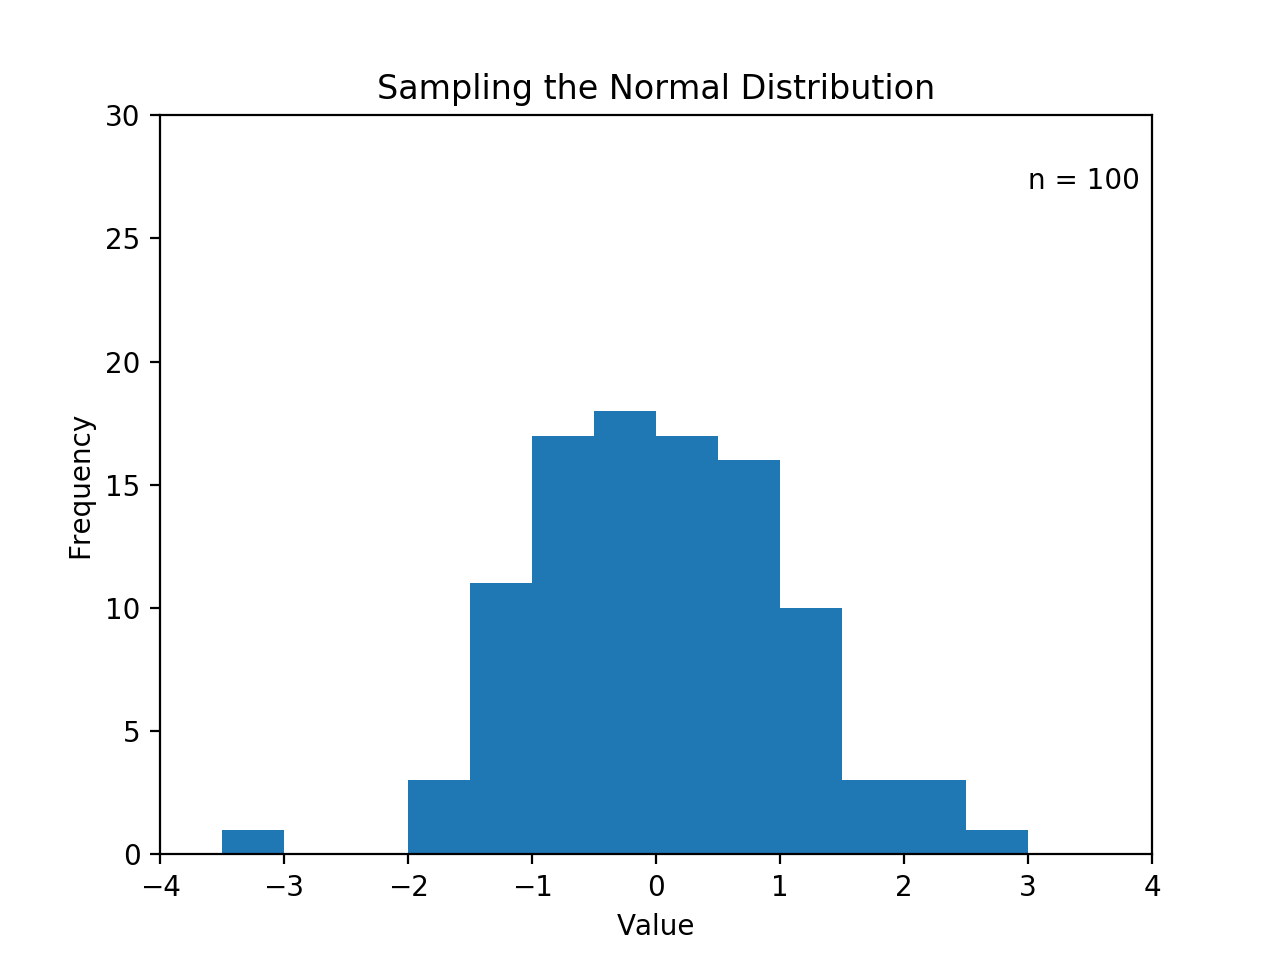

In [25]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100) # call the FuncAnimation constructor and assign this to a (a is used in function to stop the animation)
# interval: the amount of time we want between update (100milliseconds)

###### Interactivity

When the event happens, the software environment (Matplotlib backend), will call the function with the relevant data

<IPython.core.display.Javascript object>


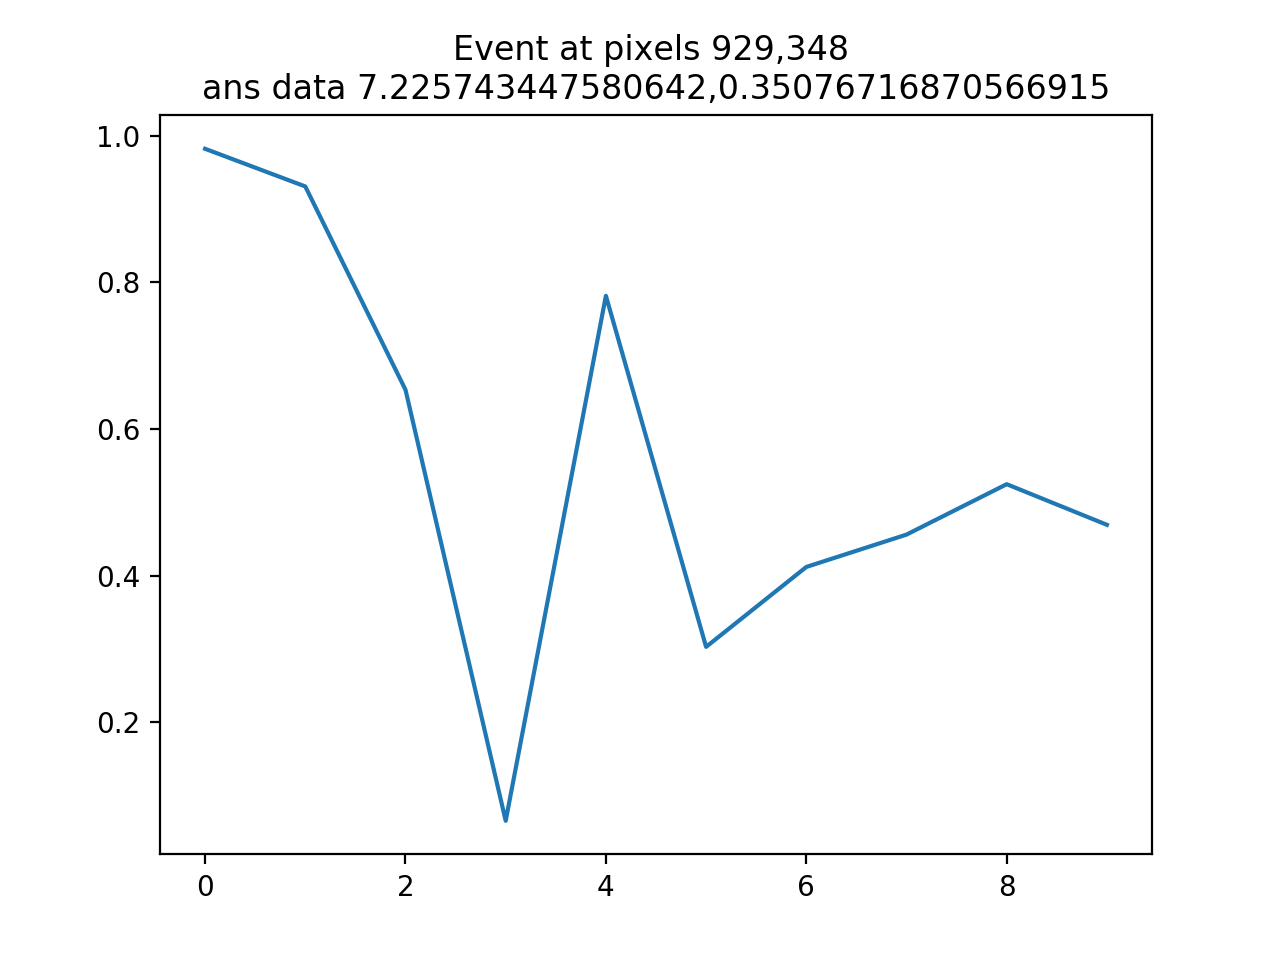

7

In [27]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

# deal with the mouse event (have x and y value as the location of mouse in pixels on the canvas)
def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nans data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
# connect this events to an event listener and this process is usually called wiring it up
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [28]:
# pick event - respind when user clicked on a visual element in the figure
import pandas as pd
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)
df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df # data used

height    weight   origin
0  0.023027  0.516039   Mexico
1  0.817119  0.155401   Canada
2  0.047970  0.603149  Germany
3  0.307594  0.513030    India
4  0.925821  0.684548       UK
5  0.391745  0.676532    Chile
6  0.974939  0.651450      USA
7  0.032042  0.424086   Brazil
8  0.161548  0.818401    China
9  0.707826  0.957696     Iraq

<IPython.core.display.Javascript object>


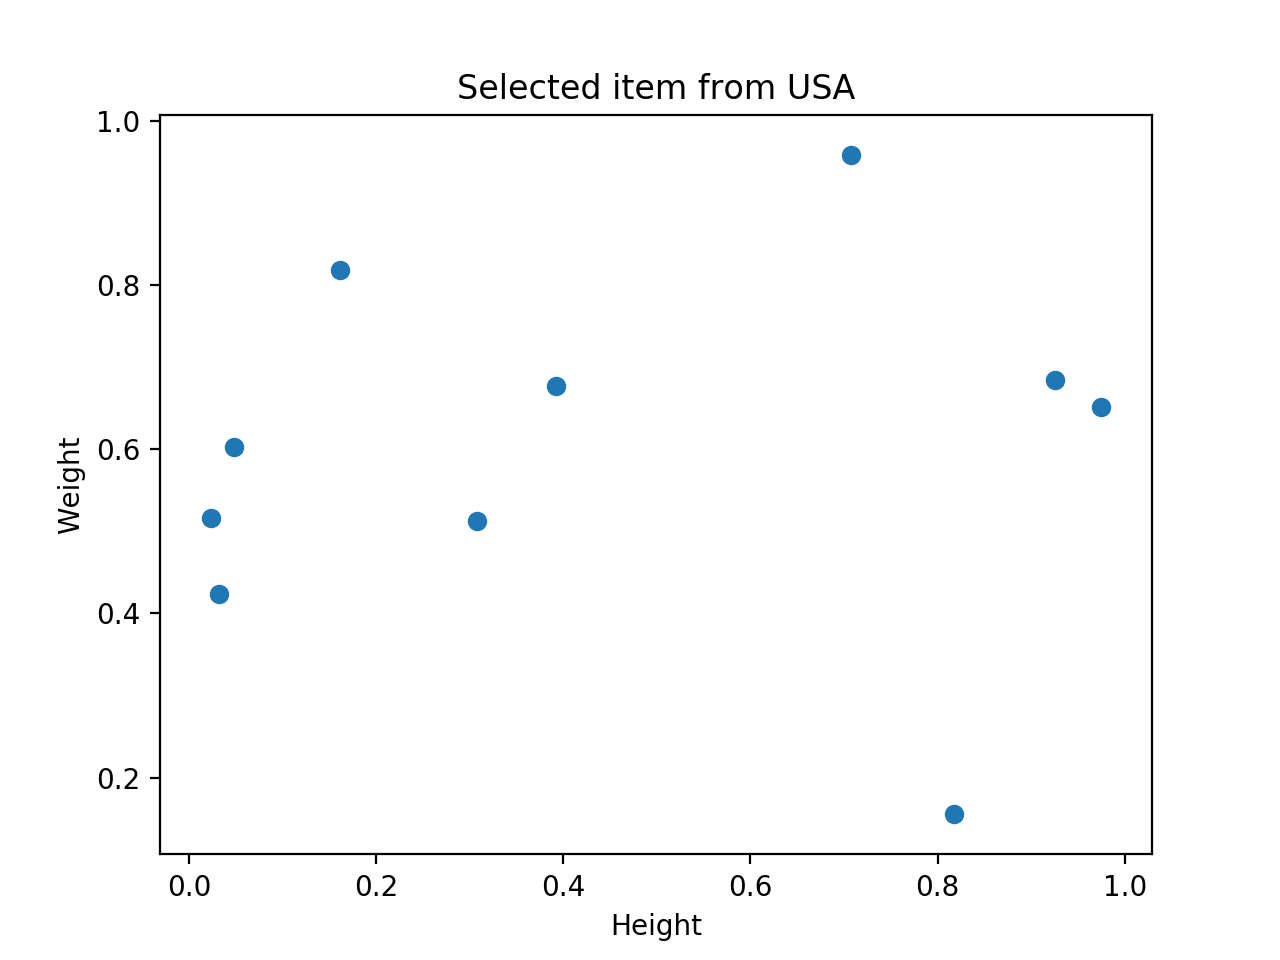

Text(0, 0.5, 'Weight')

In [30]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5) # picker=5: could have 5 pixels derivation when click
plt.gca().set_xlabel('Height')
plt.gca().set_ylabel('Weight')

In [31]:
# wired it
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin'] # the event is a pick event, got an index value corresponding to the index and dataframe
    plt.gca().set_title('Selected item from {}'.format(origin))
    
# tell mpl_connect we want pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

### Week4

##### Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see how it would change after choosing a style
plt.style.use('seaborn-colorblind')

###### DataFrame.plot

In [4]:
np.random.seed(1233)
# numpy's random state generator, with np.random.seed, the random number generated would be predictable
# for most random numbers: np.random.seed()

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
# np.random.randn - creates an array of specified shape
# np.cumsum - returns cumulative sum of the elements along the given axis (axis=0: sum along the rows)
# pandas.data_range - returns a fixed frequency DatetimeIndex
df.head() 

A          B          C
2017-01-01  0.625519  22.121452 -19.579064
2017-01-02  1.773007  21.404566 -21.438225
2017-01-03  2.751283  21.684727 -22.083171
2017-01-04  3.302309  20.863552 -22.586337
2017-01-05  3.003054  21.916773 -21.347753

<IPython.core.display.Javascript object>


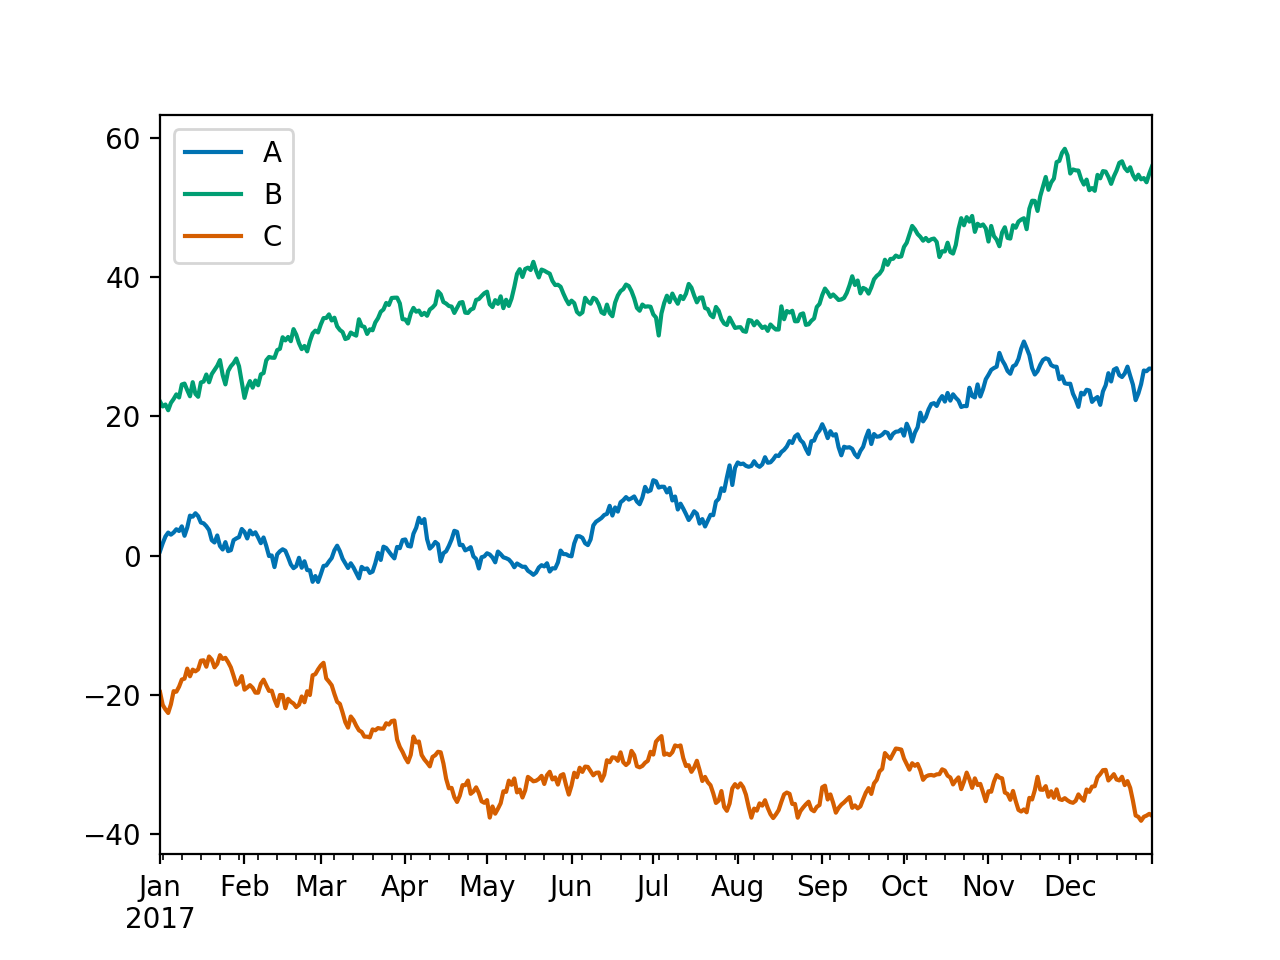

In [27]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

<IPython.core.display.Javascript object>


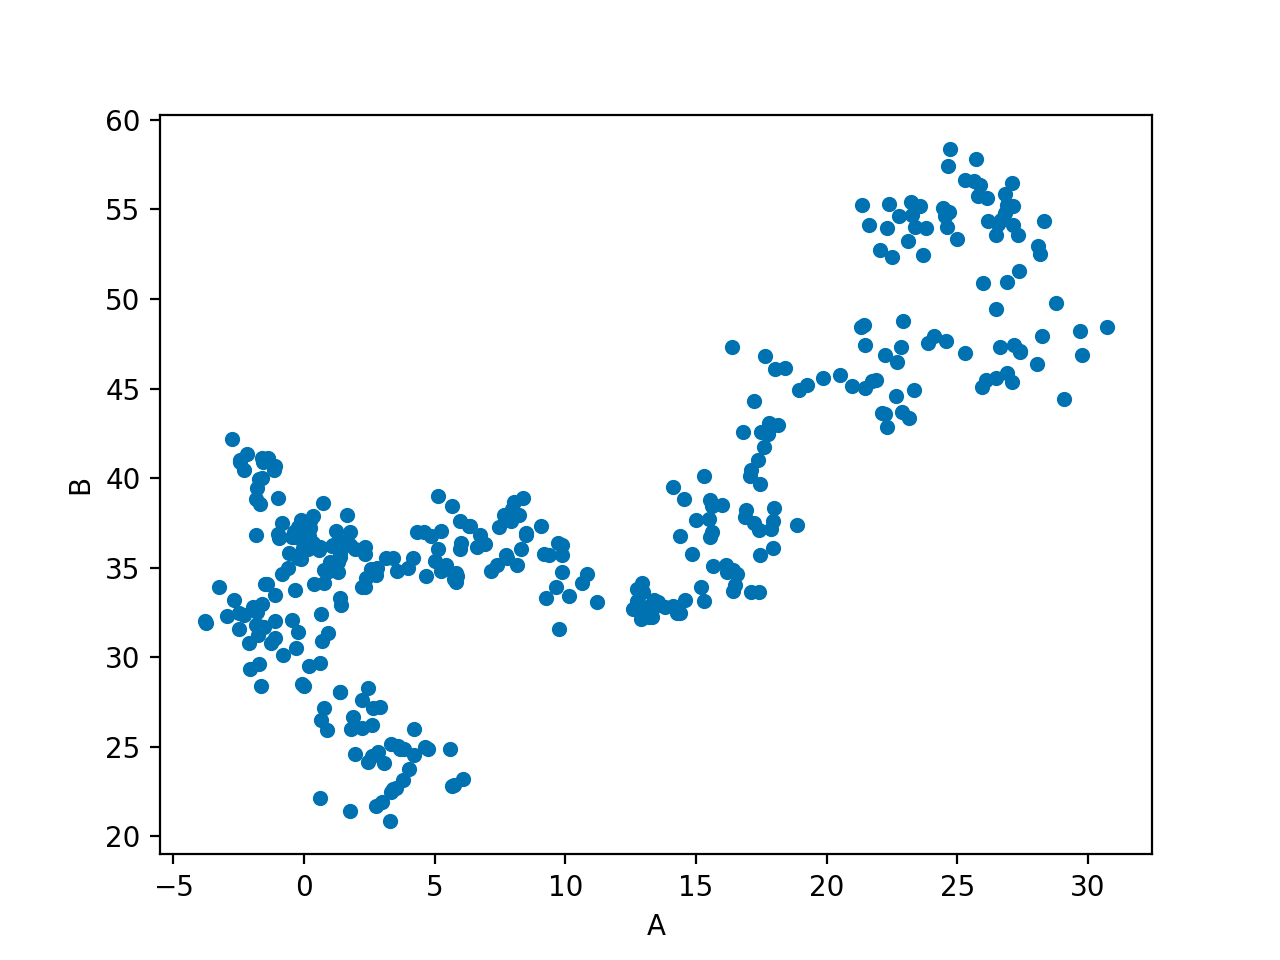

In [26]:
# plot different kind through 
df.plot('A','B', kind = 'scatter');
# or

<IPython.core.display.Javascript object>


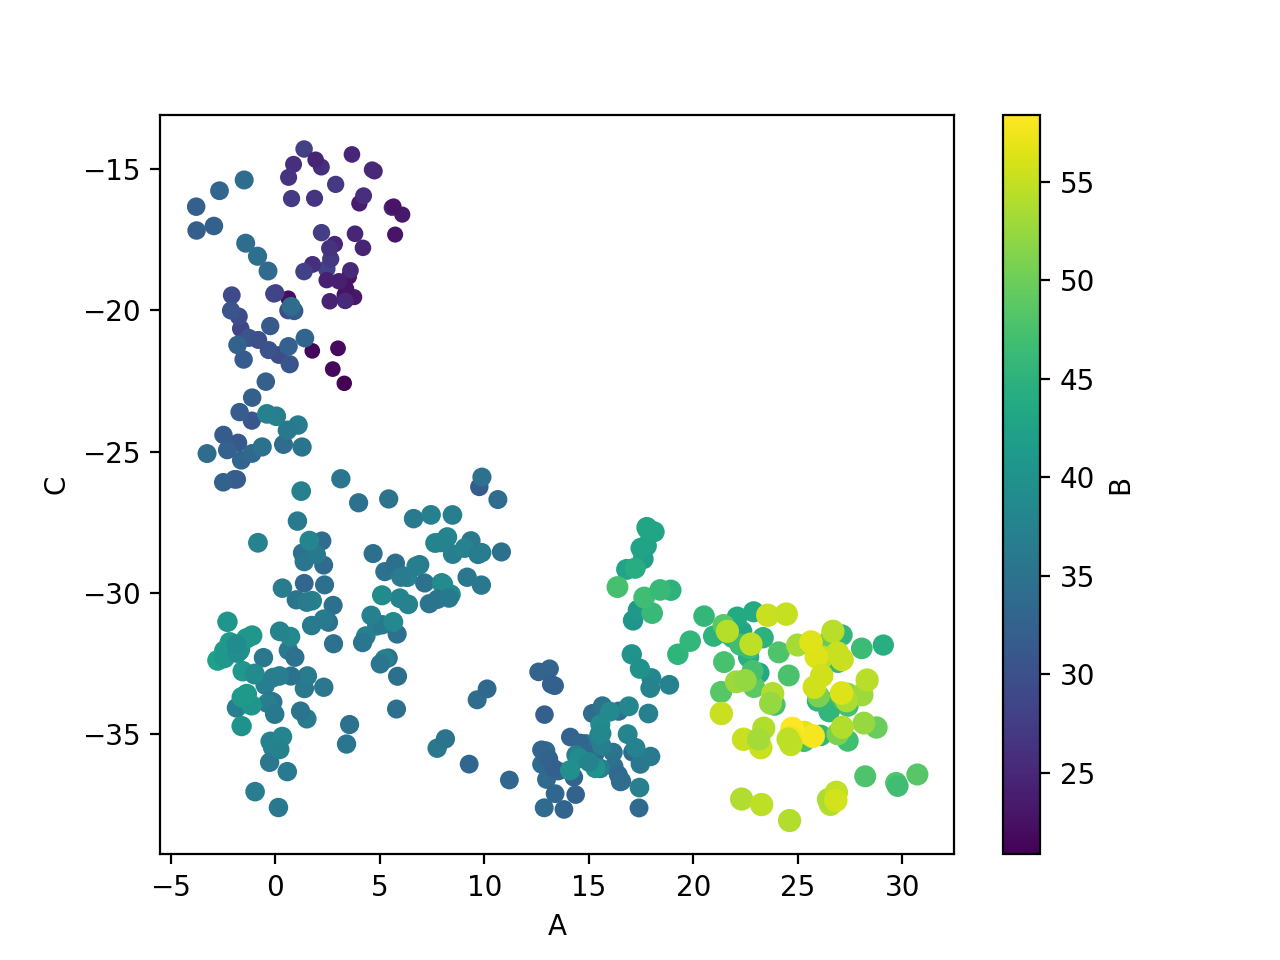

In [25]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

You can also choose the plot kind by using the DataFrame.plot.kind methods instead of providing the kind keyword argument.

kind :

'line' : line plot (default)

'bar' : vertical bar plot

'barh' : horizontal bar plot

'hist' : histogram

'box' : boxplot

'kde' : Kernel Density Estimation plot

'density' : same as 'kde'

'area' : area plot

'pie' : pie plot

'scatter' : scatter plot

'hexbin' : hexbin plot

<IPython.core.display.Javascript object>


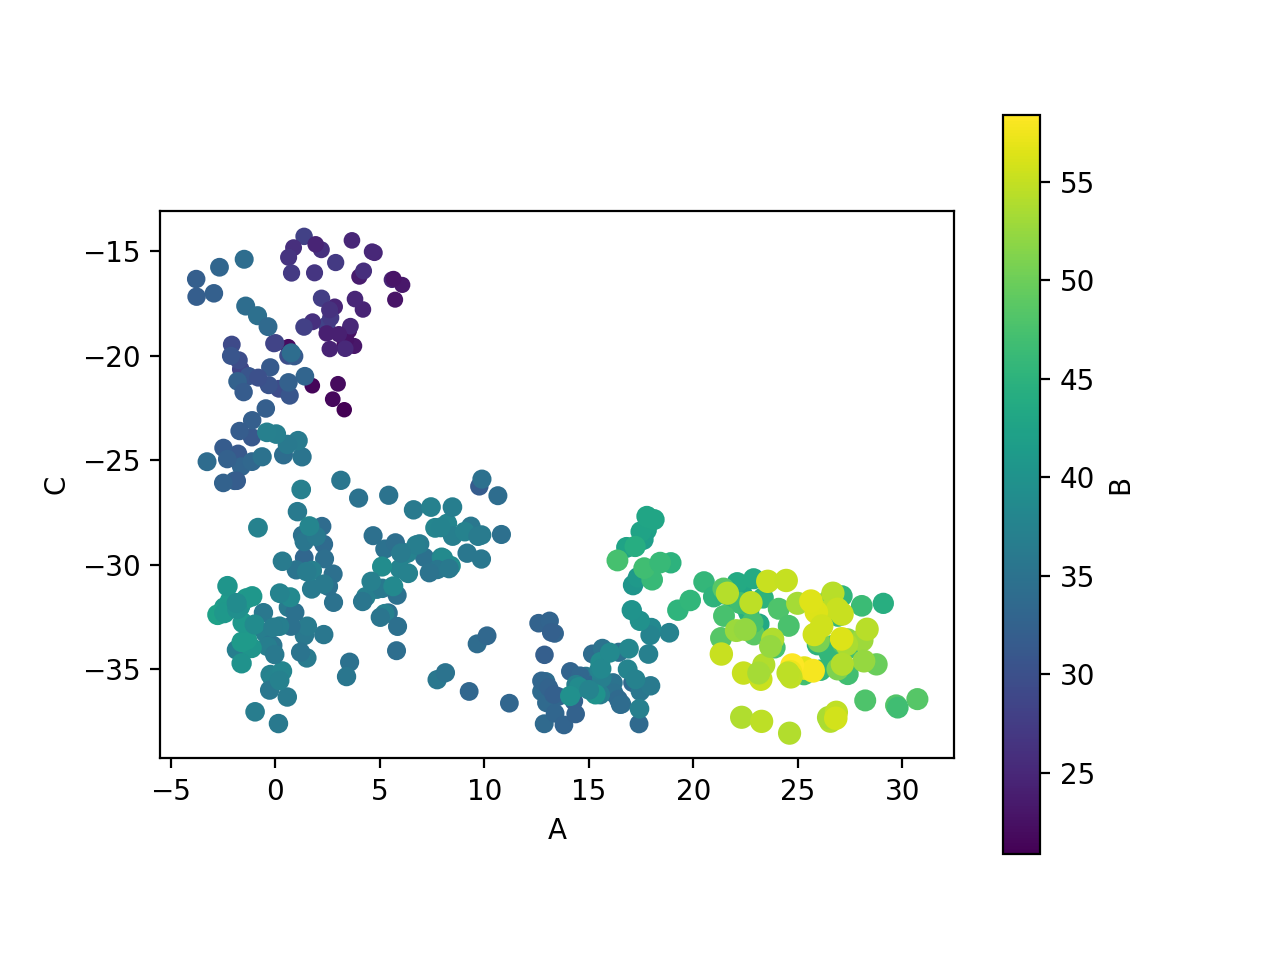

In [24]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis') # returns a matplotlib.axes._subplot 
# could perform modification on this object as returned by matplotlib plots
ax.set_aspect('equal') # could easily see the range of series 'A' is smaller

<IPython.core.display.Javascript object>


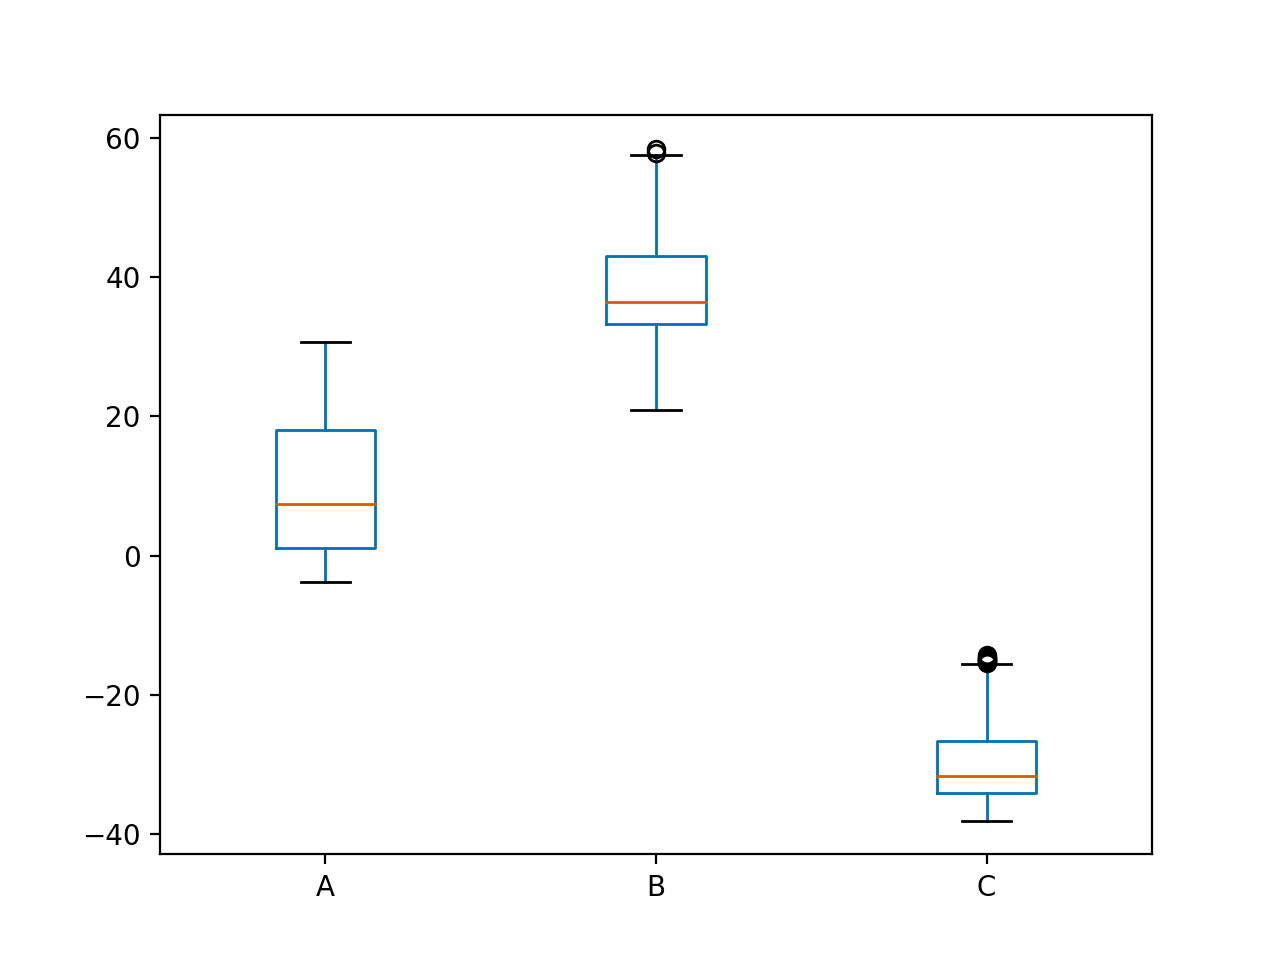

In [23]:
df.plot.box();

<IPython.core.display.Javascript object>


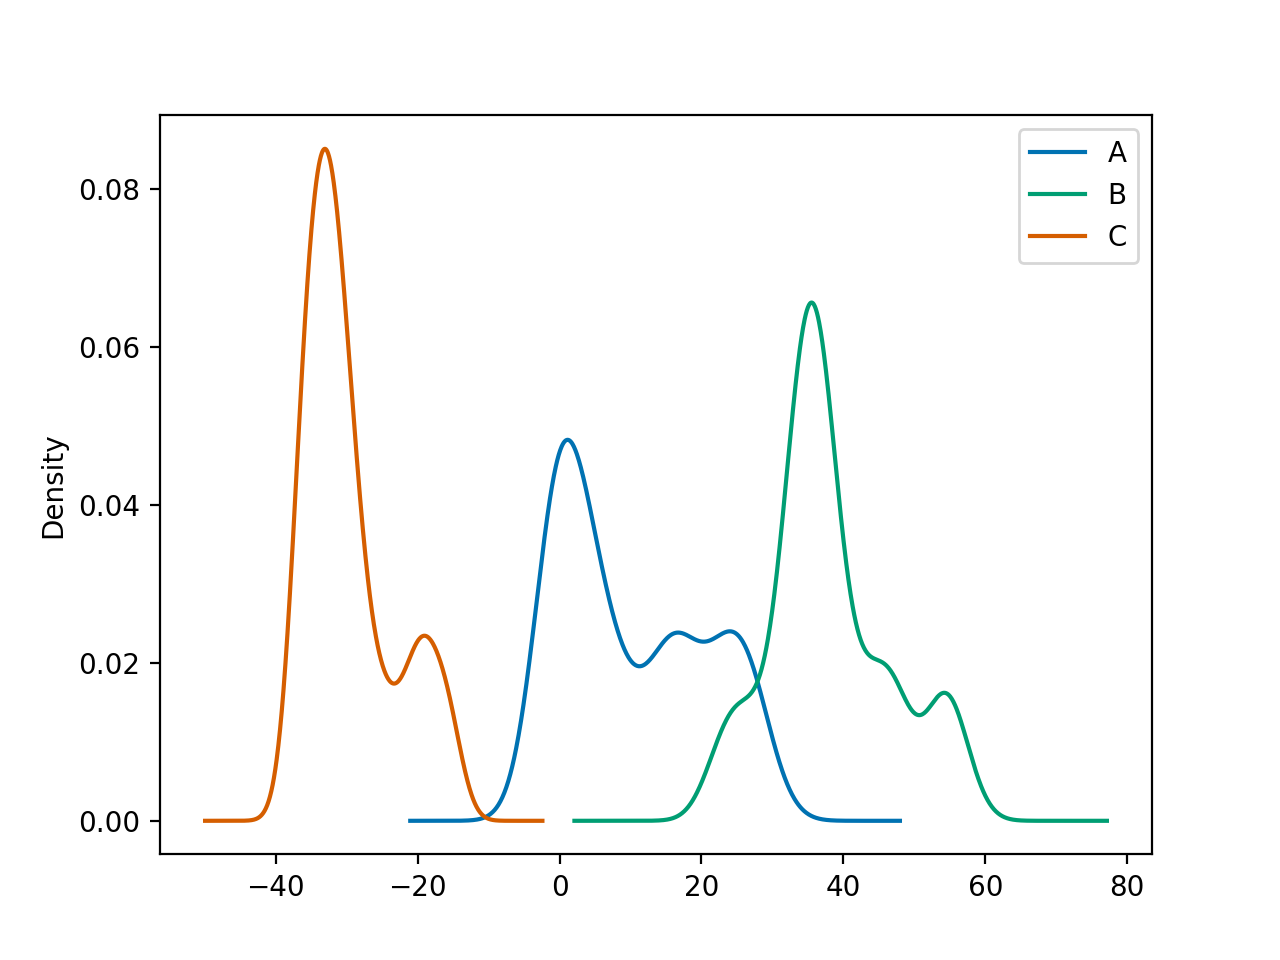

In [22]:
# kernel density extimation plots: derive a smooth continuous function from a given sample
df.plot.kde()

###### Pandas.tools.plotting
Actually remove to pandas.plotting

In [13]:
iris = pd.read_csv('iris.csv')
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


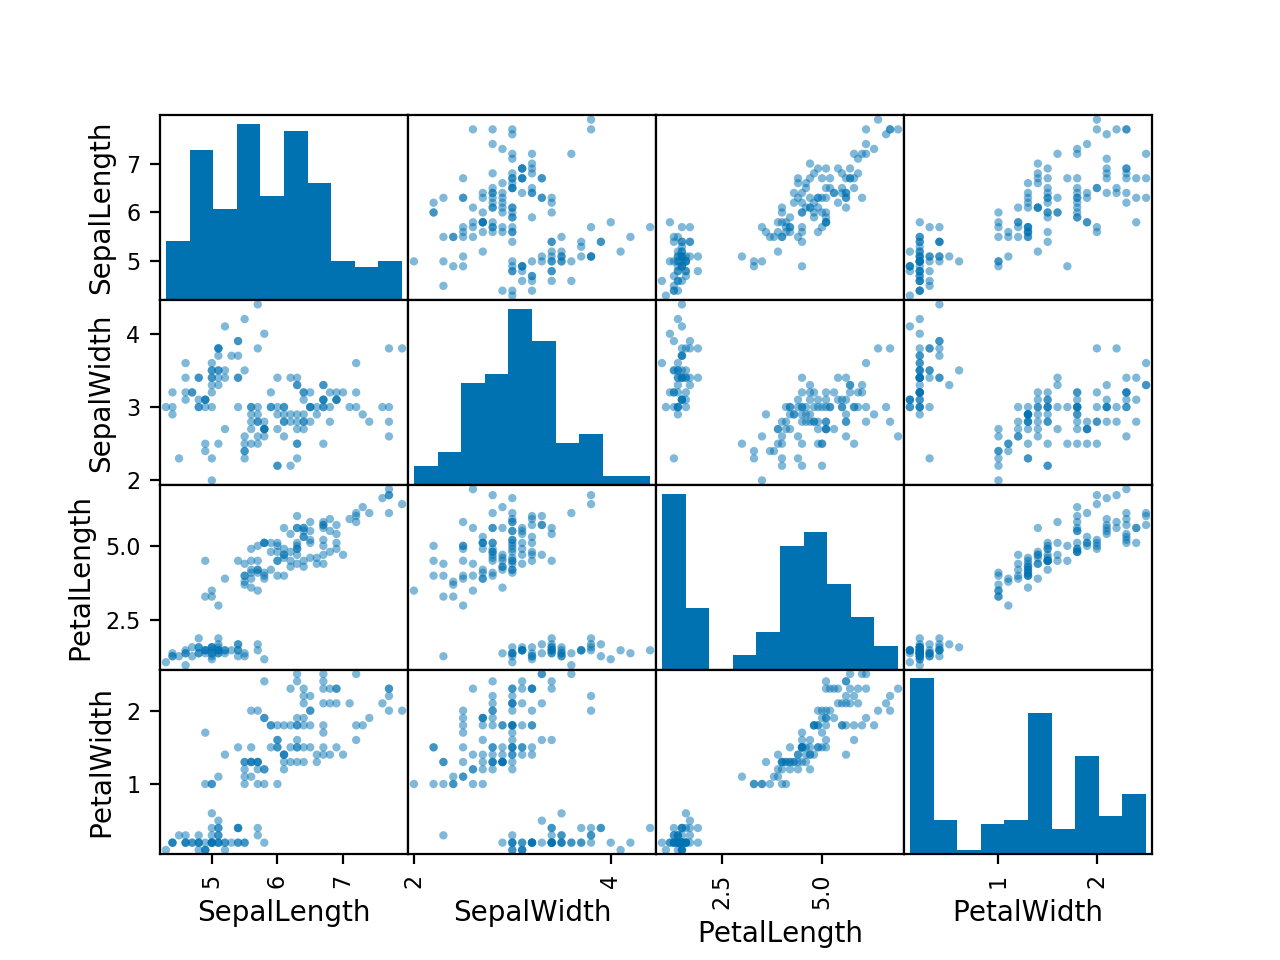

In [21]:
pd.plotting.scatter_matrix(iris);
# scatter matrix: compare each column in a DataFrame to every other column in a pairwise fashion

<IPython.core.display.Javascript object>


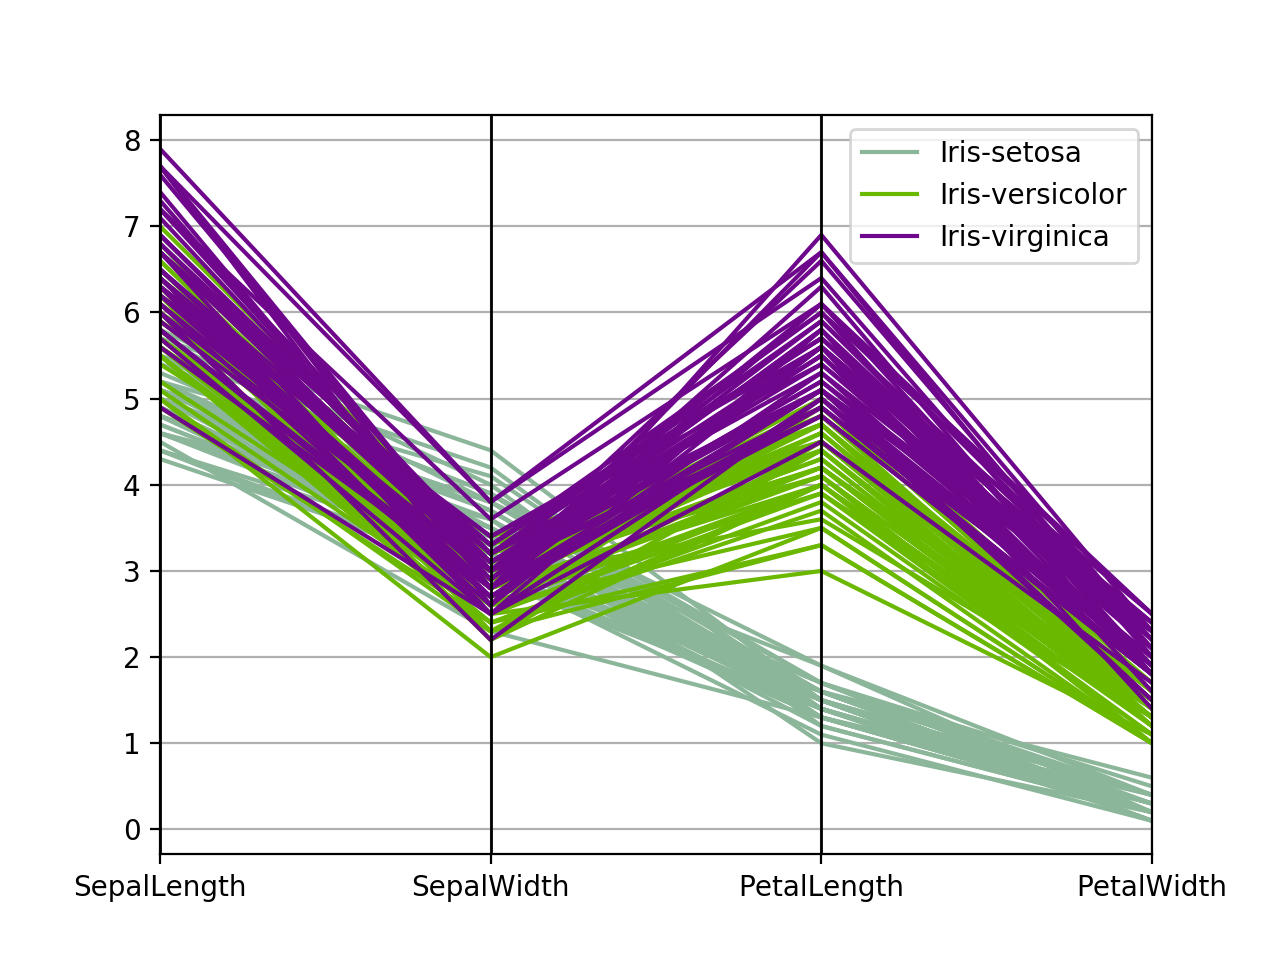

In [20]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');
# visualize high dimensional multivariate data
# each variable in the dataset corresponds to an equally spaced parallel vertical line, values of each variable connected by lines between for each individual observation

##### Seaborn

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [29]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
# 1000 numbers drawn from a normal distribution with a mean of 0, standard deviation of 10
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


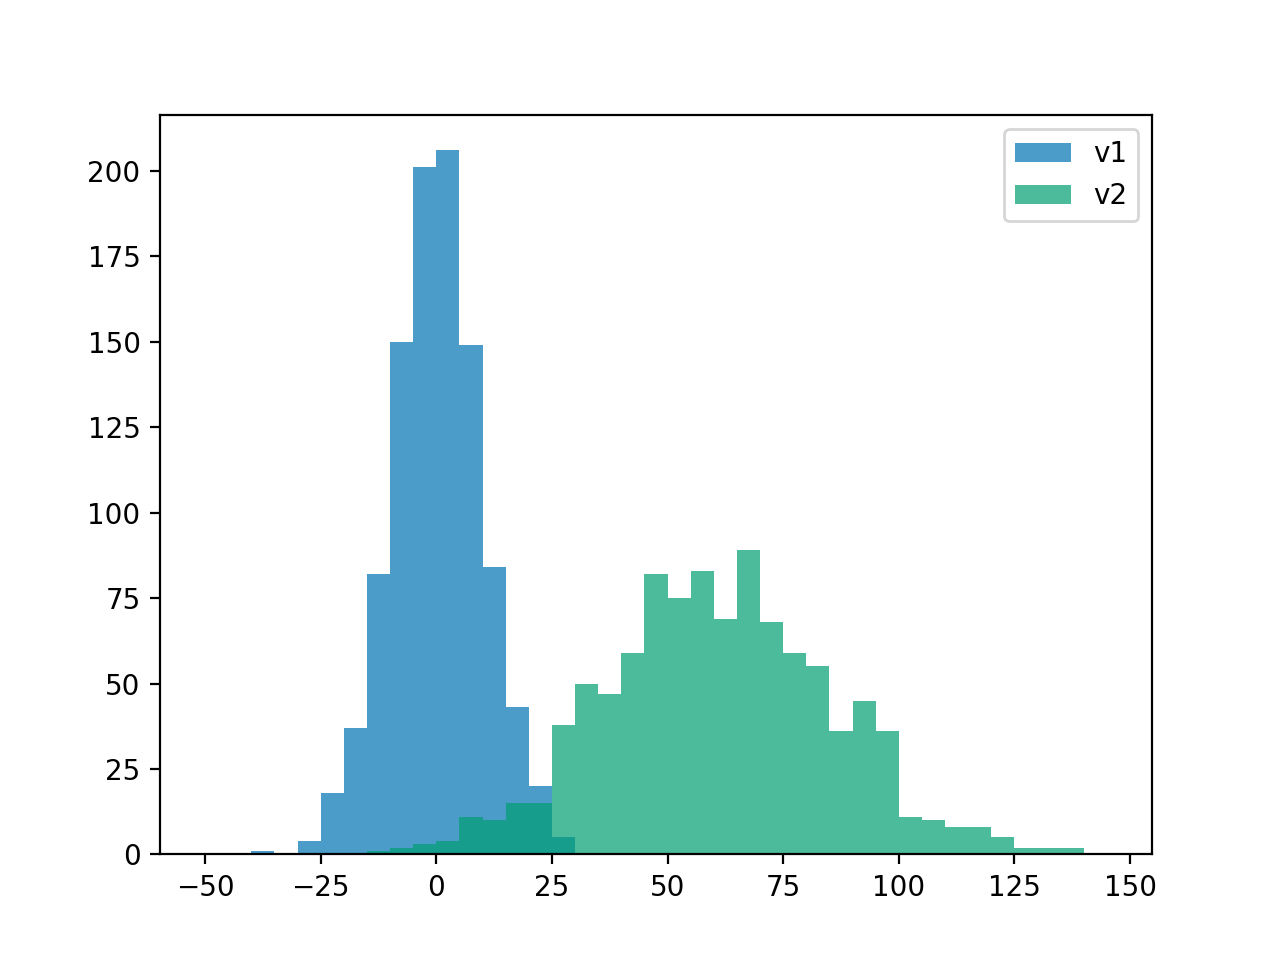

In [31]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1')
# with np.arange, a specific sequence could specify the specific bins we want to use
# useful when plot two histograms in the same figure to make sure the bin size is equavilant 
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2')
plt.legend()

In [30]:
np.arange(-50,150,5)

array([-50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,
        15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
        80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
       145])

<IPython.core.display.Javascript object>


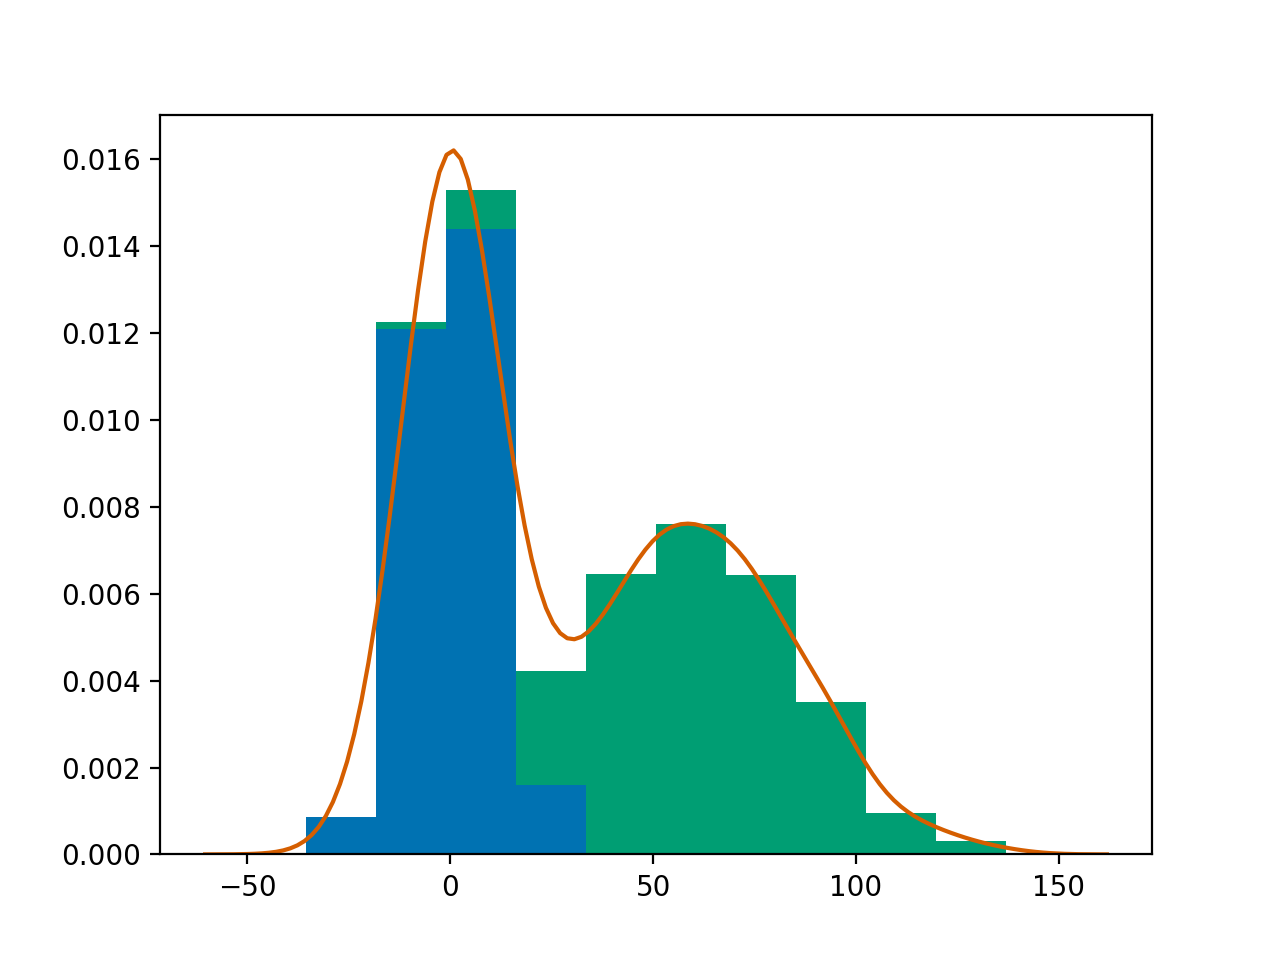

In [32]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density='True'); # a stacked barchart
v3 = np.concatenate((v1, v2)) # concatenate arrays
sns.kdeplot(v3)

<IPython.core.display.Javascript object>


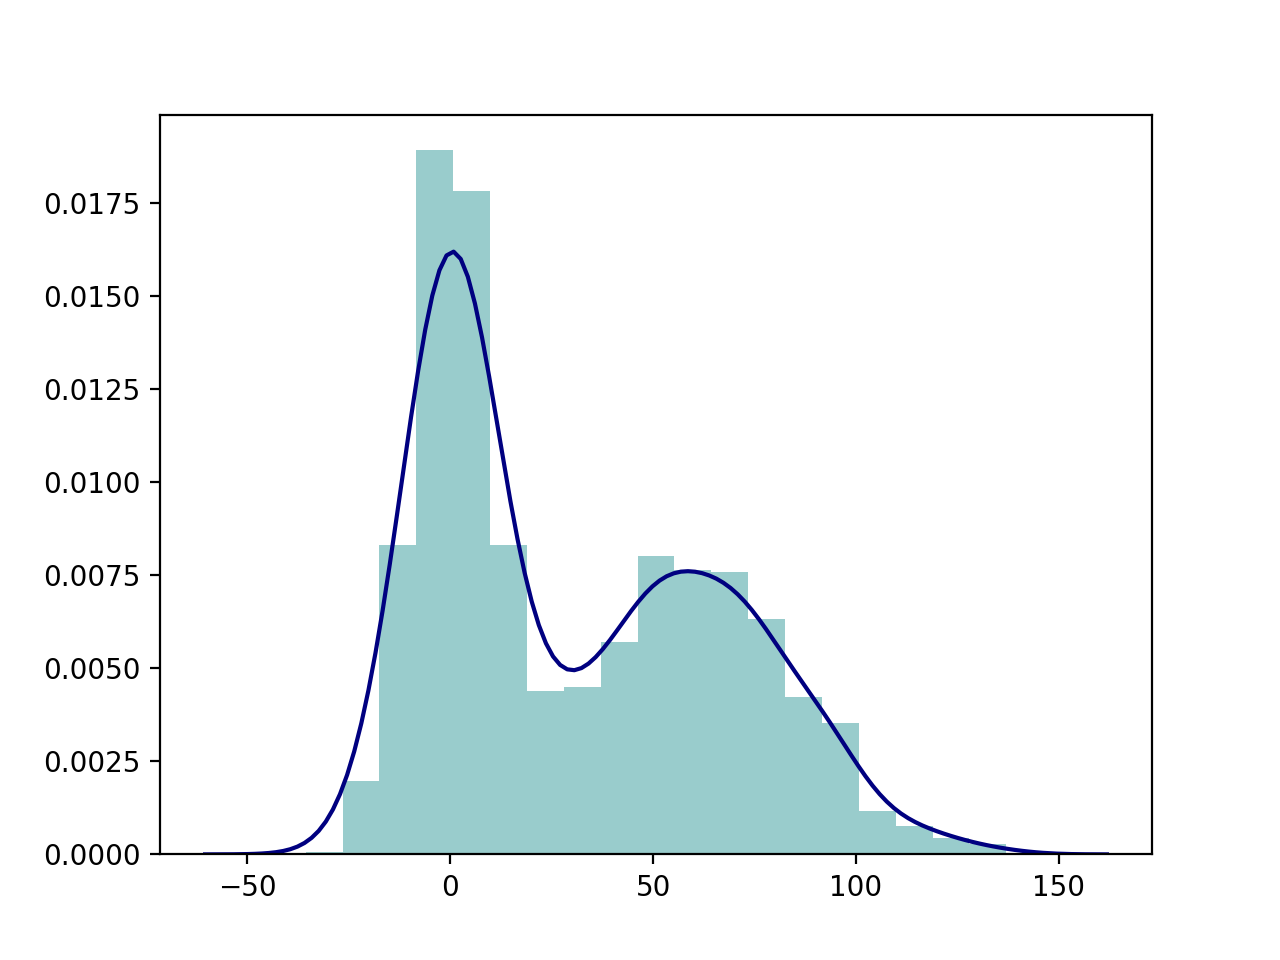

In [33]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


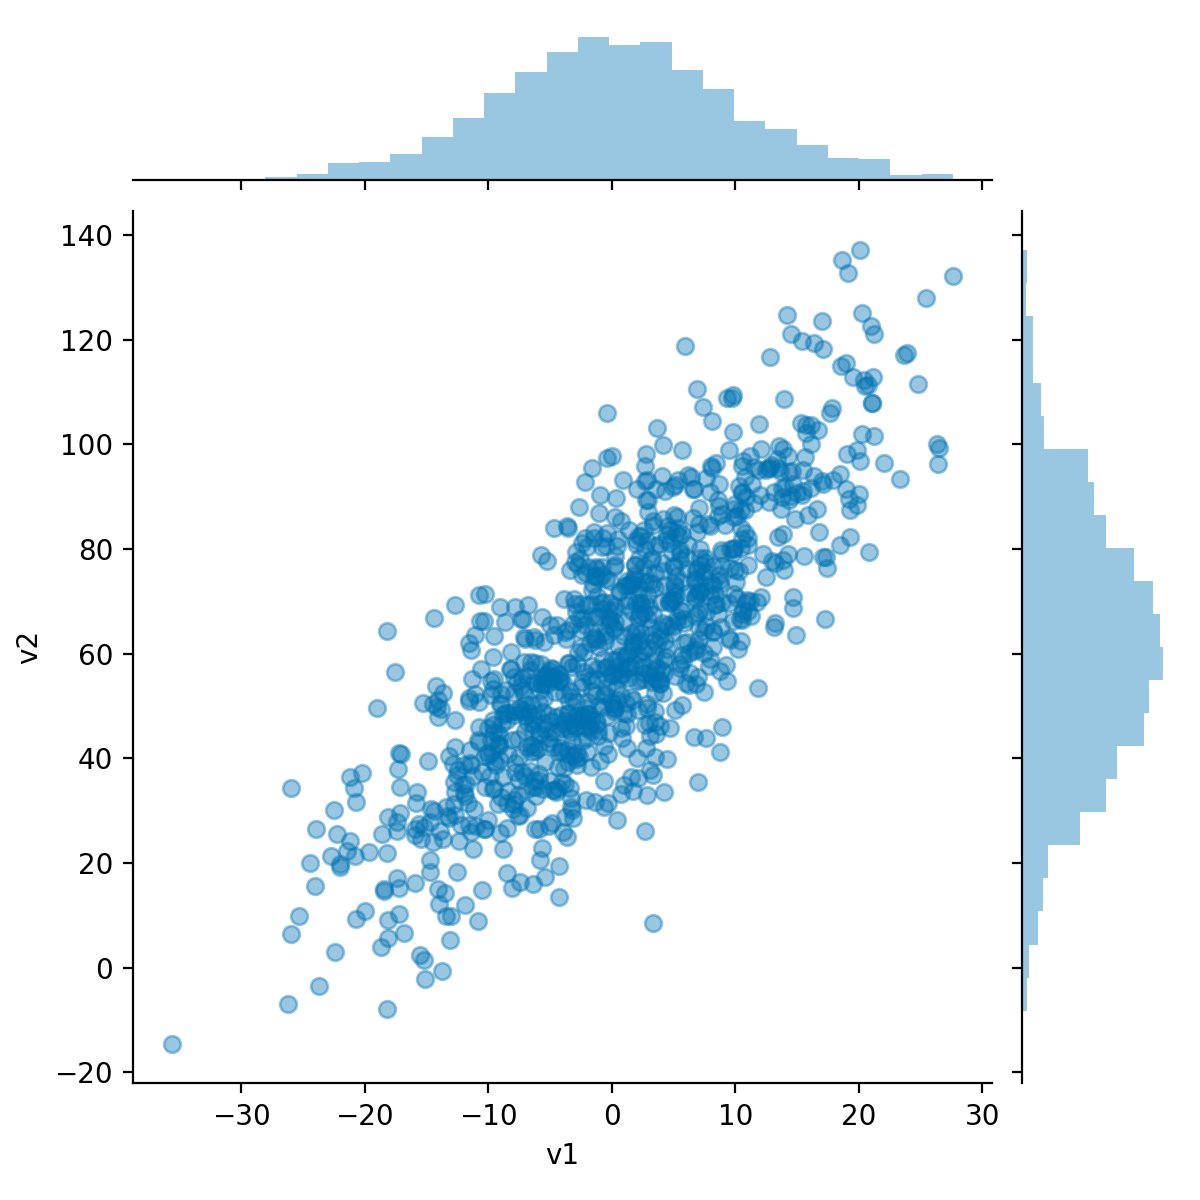

In [35]:
sns.jointplot(v1, v2, alpha=0.4) # to see the overlap dots with alpha

<IPython.core.display.Javascript object>


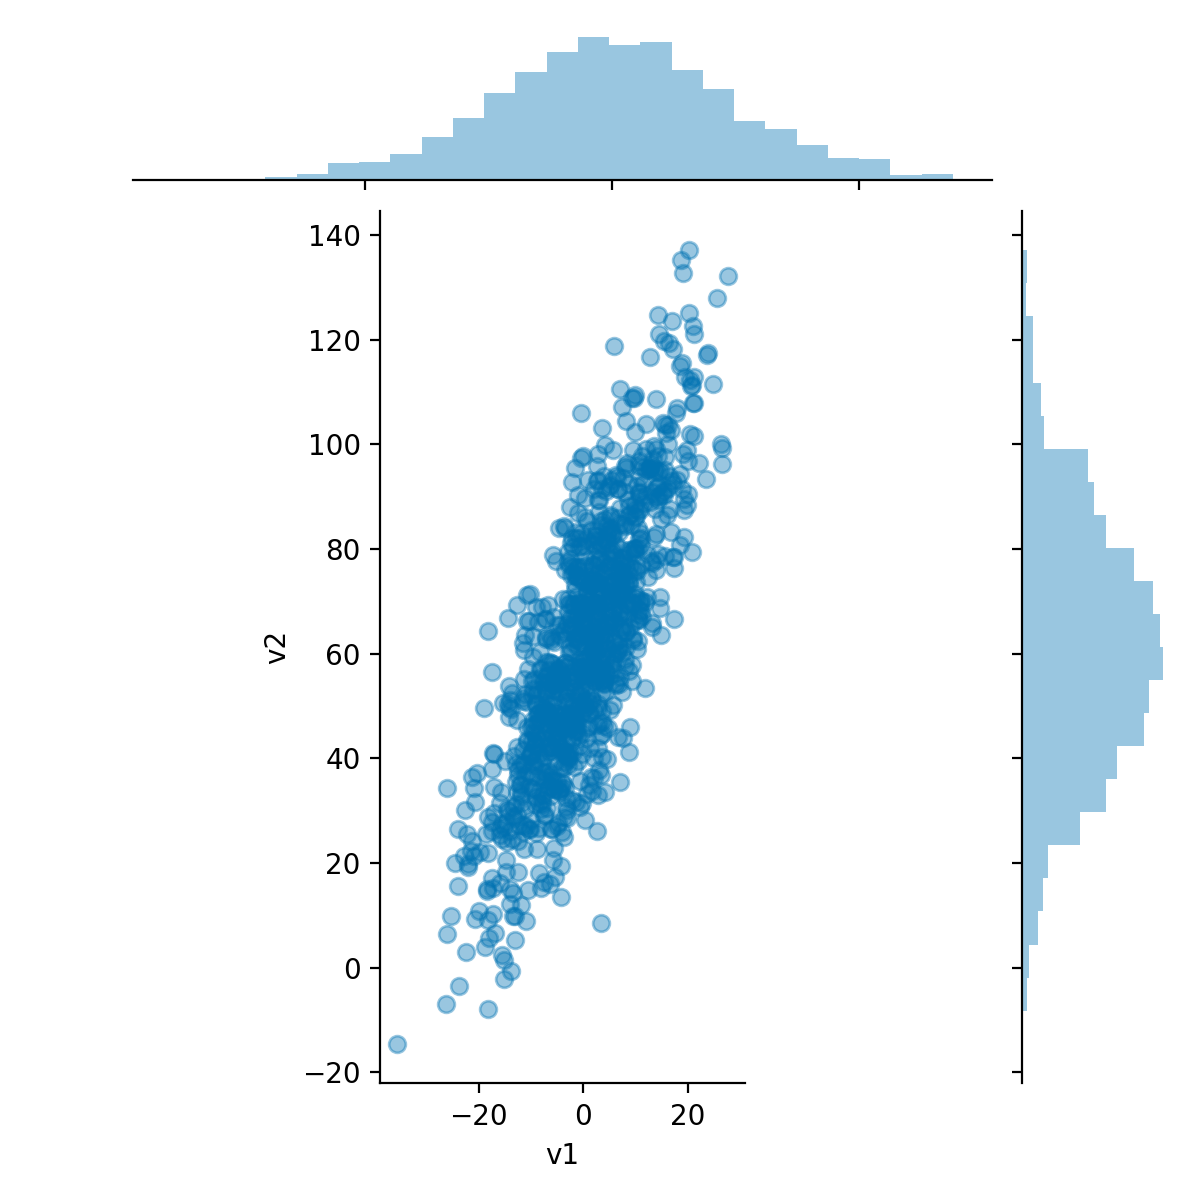

In [36]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


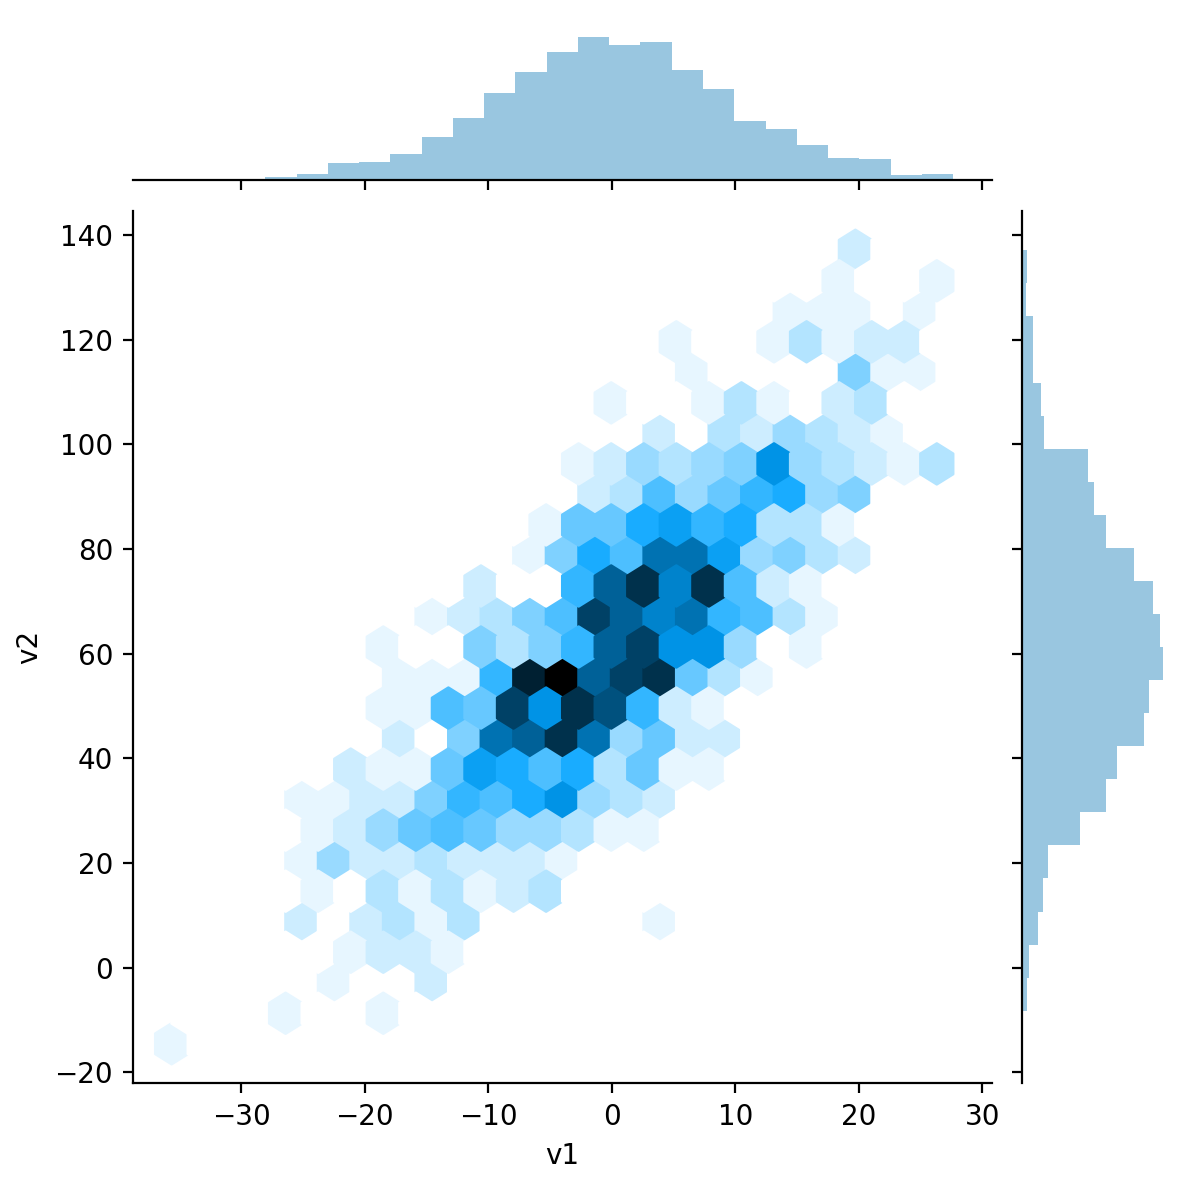

In [37]:
sns.jointplot(v1, v2, kind='hex')

<IPython.core.display.Javascript object>


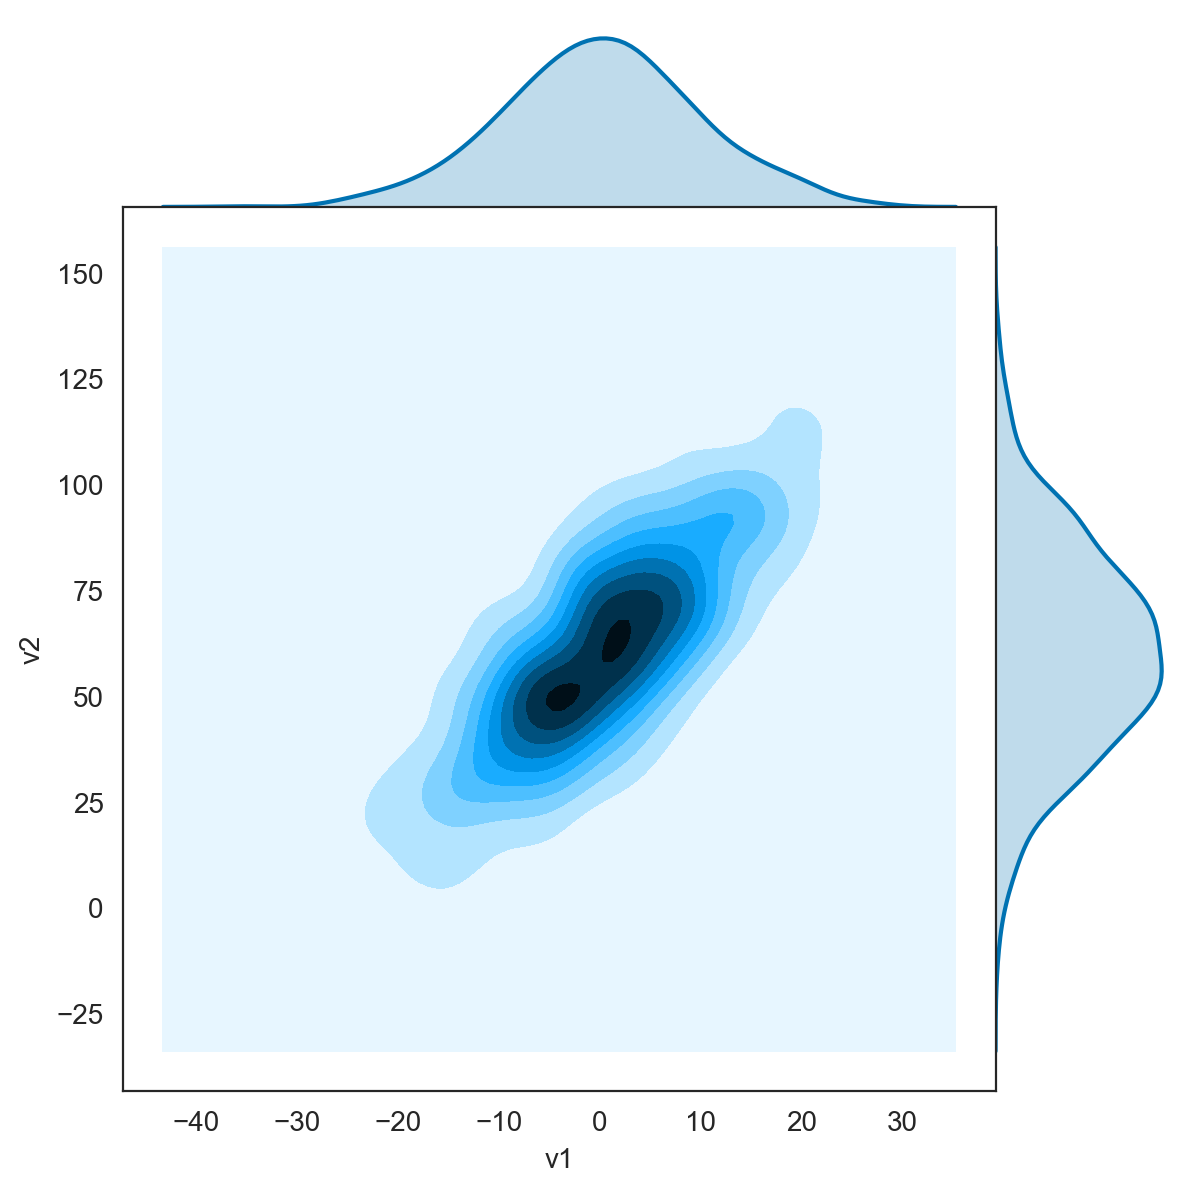

In [38]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [39]:
iris = pd.read_csv('iris.csv')
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

<IPython.core.display.Javascript object>


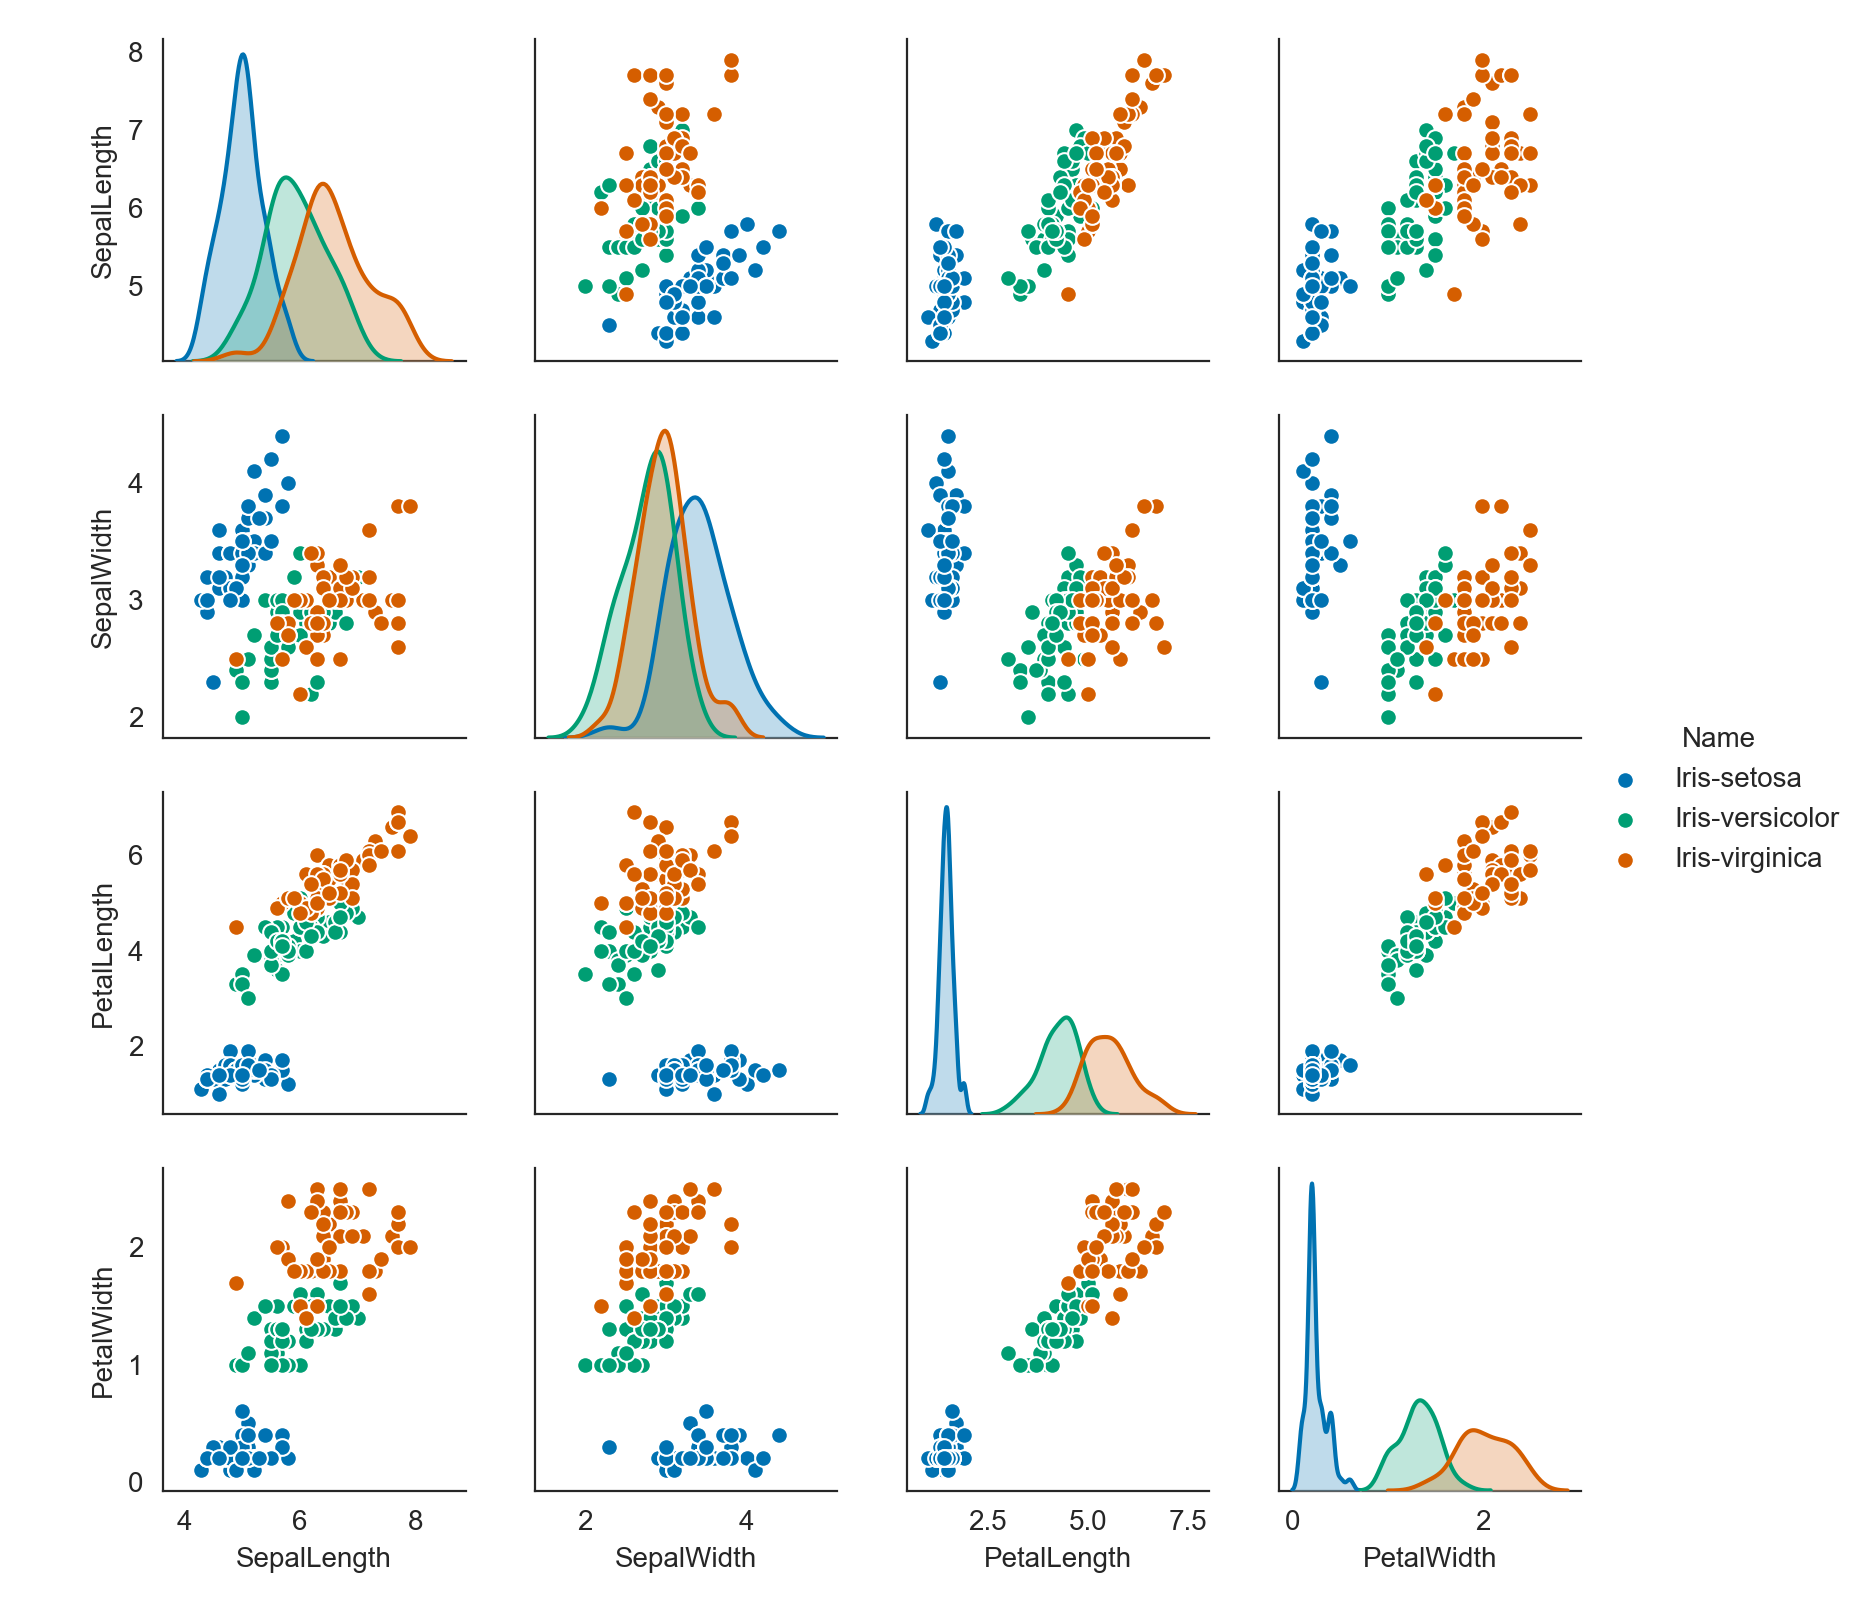

In [41]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2)
# hue parameter: map name with different colors 

<IPython.core.display.Javascript object>


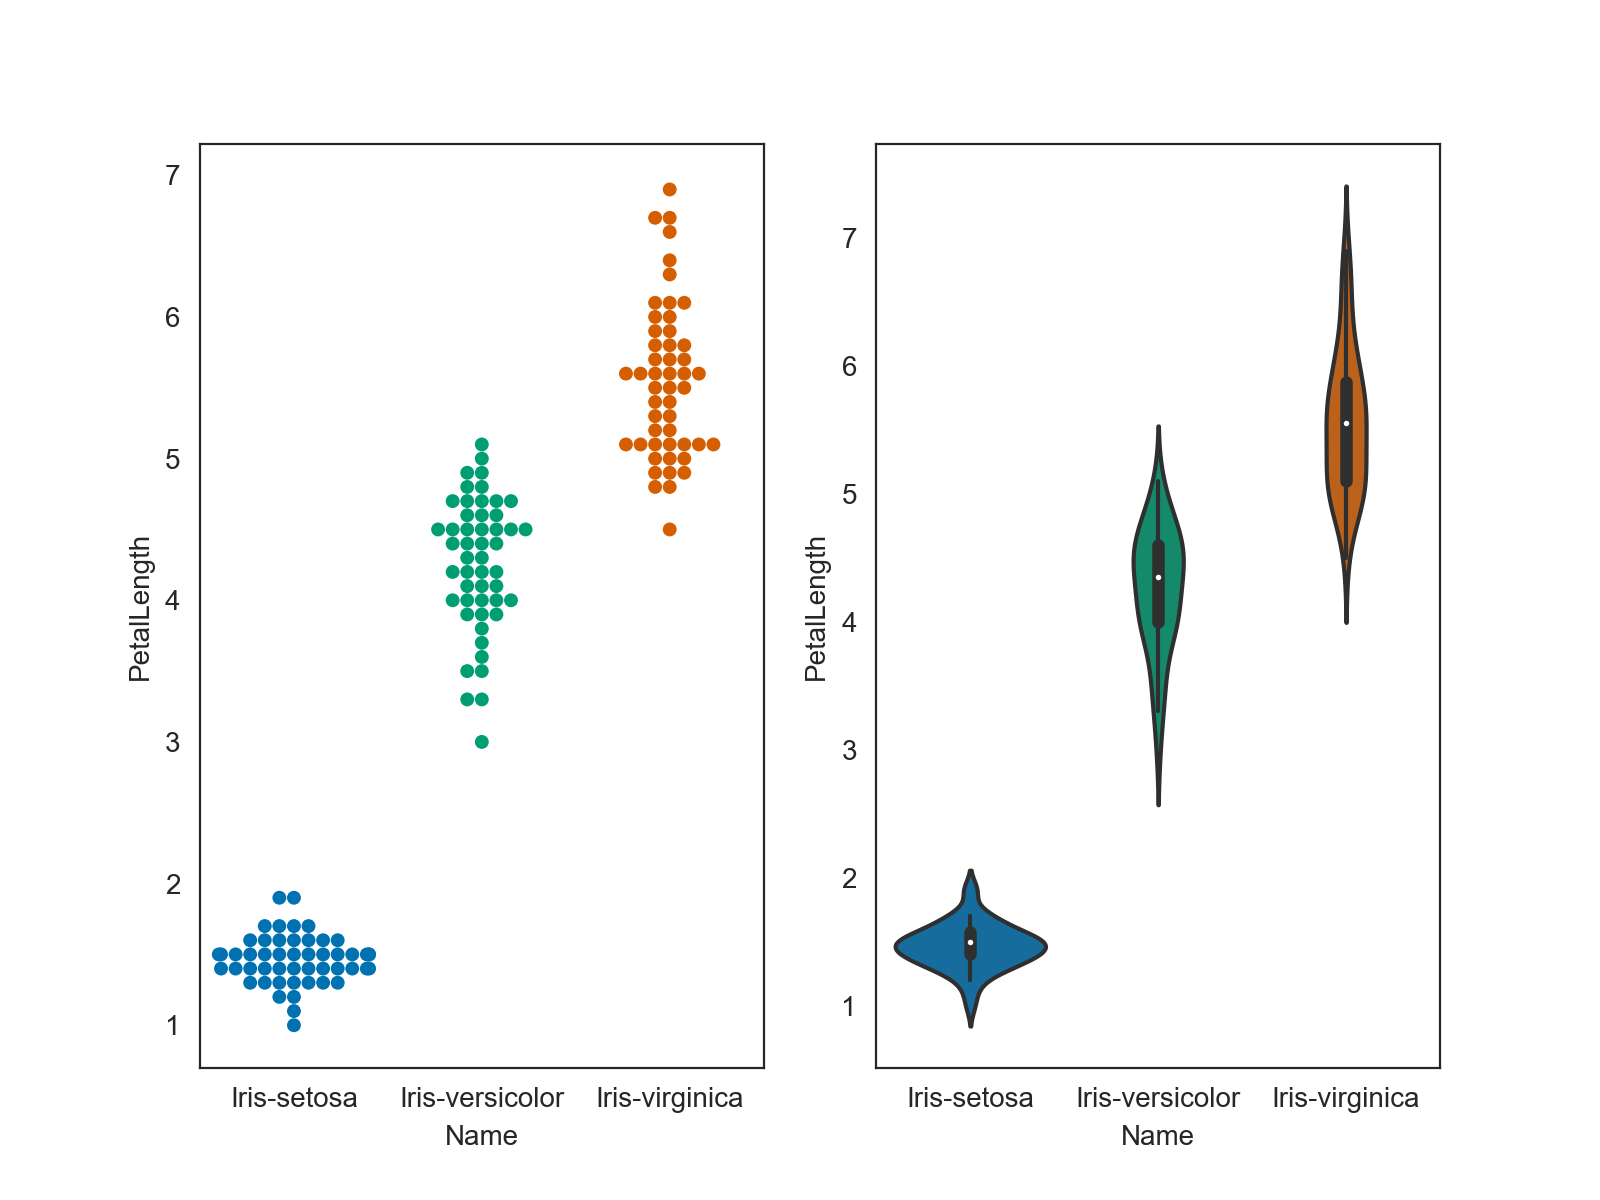

In [42]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris); # similar to a scatter plot for categorical data
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris); # like a bos plot, with rotated kernel density estimation on each side